In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.api.types as ptypes

games = pd.read_csv('./PS-2025.1/Data/campeonatos_futebol_atualizacao.csv')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       26204 non-null  float64
 1   Chutes a gol 2       26204 non-null  float64
 2   Impedimentos 1       24942 non-null  float64
 3   Impedimentos 2       24942 non-null  float64
 4   Escanteios 1         25388 non-null  float64
 5   Escanteios 2         25388 non-null  float64
 6   Chutes fora 1        25392 non-null  float64
 7   Chutes fora 2        25392 non-null  float64
 8   Faltas 1             25394 non-null  float64
 9   Faltas 2             25394 non-null  float64
 10  Cartões amarelos 1   27716 non-null  float64
 11  Cartões amarelos 2   27716 non-null  float64
 12  Cartões vermelhos 1  27716 non-null  float64
 13  Cartões vermelhos 2  27716 non-null  float64
 14  Cruzamentos 1        9015 non-null   float64
 15  Cruzamentos 2        9015 non-null  

In [168]:
print(games.head(20))

    Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0              8.0             0.0             6.0             3.0   
1              0.0             2.0             0.0             2.0   
2              4.0             5.0             1.0             5.0   
3              4.0             7.0             8.0             1.0   
4              3.0             1.0             1.0             3.0   
5              5.0             5.0             1.0             0.0   
6              2.0             2.0             0.0             1.0   
7              3.0             4.0             5.0             1.0   
8             15.0             0.0             0.0             4.0   
9              4.0             3.0             2.0             1.0   
10             4.0             5.0             4.0             1.0   
11             6.0             0.0             2.0             2.0   
12             3.0             6.0             0.0             1.0   
13            12.0  

## Dicionário de dados

|    | Colunas             | Tipo de dados   | Descrição                                                                                             |   Resultados Iniciais | Hipóteses                                                                                                                                                                                              |
|---:|:--------------------|:----------------|:------------------------------------------------------------------------------------------------------|----------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Chutes a gol 1      | float64         | Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2. |                   nan | Tem missing? Qual a relação com o número de gols? Tem um desvio padrão baixo em relação ao número de chutes a gol e ao número de gols?                                                                 |
|  1 | Chutes a gol 2      | float64         | Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2. |                   nan | Tem missing? Qual a relação com o número de gols? Tem um desvio padrão baixo em relação ao número de chutes a gol e ao número de gols?                                                                 |
|  2 | Impedimentos 1      | float64         | Quantas vezes cada time foi pego em posição de impedimento.                                           |                   nan | Tem missing? Qual a relação com tiro de meta? Tem relação negativa com o número de gols?                                                                                                               |
|  3 | Impedimentos 2      | float64         | Quantas vezes cada time foi pego em posição de impedimento.                                           |                   nan | Tem missing? Qual a relação com tiro de meta? Tem relação negativa com o número de gols?                                                                                                               |
|  4 | Escanteios 1        | float64         | Total de cobranças de escanteio a favor de cada equipe.                                               |                   nan | Tem missing? Qual o impacto dos escanteios nos gols? É algum indicativo de que o time está com melhor ataque? Isso reduz ou aumenta o número de gols nas partidas? Tem relação com chutes bloqueados?  |
|  5 | Escanteios 2        | float64         | Total de cobranças de escanteio a favor de cada equipe.                                               |                   nan | Tem missing? Qual o impacto dos escanteios nos gols? É algum indicativo de que o time está com melhor ataque? Isso reduz ou aumenta o número de gols nas partidas? Tem relação com chutes bloqueados?  |
|  6 | Chutes fora 1       | float64         | Finalizações que não foram na direção do gol (para fora) de cada time.                                |                   nan | Tem missing? Tem relação com o número de gols? Tem relação com a força do ataque do time?                                                                                                              |
|  7 | Chutes fora 2       | float64         | Finalizações que não foram na direção do gol (para fora) de cada time.                                |                   nan | Tem missing? Tem relação com o número de gols? Tem relação com a força do ataque do time?                                                                                                              |
|  8 | Faltas 1            | float64         | Quantas faltas cada time cometeu durante a partida.                                                   |                   nan | Tem missing?                                                                                                                                                                                           |
|  9 | Faltas 2            | float64         | Quantas faltas cada time cometeu durante a partida.                                                   |                   nan | Tem missing?                                                                                                                                                                                           |
| 10 | Cartões amarelos 1  | float64         | Quantos cartões amarelos foram mostrados a jogadores de cada time.                                    |                   nan | Tem missing?                                                                                                                                                                                           |
| 11 | Cartões amarelos 2  | float64         | Quantos cartões amarelos foram mostrados a jogadores de cada time.                                    |                   nan | Tem missing?                                                                                                                                                                                           |
| 12 | Cartões vermelhos 1 | float64         | Quantos cartões vermelhos foram mostrados a jogadores de cada time.                                   |                   nan | Tem missing?                                                                                                                                                                                           |
| 13 | Cartões vermelhos 2 | float64         | Quantos cartões vermelhos foram mostrados a jogadores de cada time.                                   |                   nan | Tem missing?                                                                                                                                                                                           |
| 14 | Cruzamentos 1       | float64         | Número de passes laterais elevados (cruzamentos) realizados por cada equipe.                          |                   nan | Tem missing? Tem relação com chutes a gol/chutes para fora/gols? Tem relação com impedimento/tiro de meta?                                                                                             |
| 15 | Cruzamentos 2       | float64         | Número de passes laterais elevados (cruzamentos) realizados por cada equipe.                          |                   nan | Tem missing? Tem relação com chutes a gol/chutes para fora/gols? Tem relação com impedimento/tiro de meta?                                                                                             |
| 16 | Laterais 1          | float64         | Quantas vezes cada time executou arremessos laterais.                                                 |                   nan | Tem missing?                                                                                                                                                                                           |
| 17 | Laterais 2          | float64         | Quantas vezes cada time executou arremessos laterais.                                                 |                   nan | Tem missing?                                                                                                                                                                                           |
| 18 | Chutes bloqueados 1 | float64         | Finalizações de cada time que foram bloqueadas por defensores adversários.                            |                   nan | Tem missing? Tem relação com os contra-ataques? Tem relação com faltas?                                                                                                                                |
| 19 | Chutes bloqueados 2 | float64         | Finalizações de cada time que foram bloqueadas por defensores adversários.                            |                   nan | Tem missing? Tem relação com os contra-ataques? Tem relação com faltas?                                                                                                                                |
| 20 | Contra-ataques 1    | float64         | Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.                 |                   nan | Tem missing? Qual a relação do número de contra-ataques com a frequência de gols/chutes a gol?                                                                                                         |
| 21 | Contra-ataques 2    | float64         | Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.                 |                   nan | Tem missing? Qual a relação do número de contra-ataques com a frequência de gols/chutes a gol?                                                                                                         |
| 22 | Gols 1              | float64         | Número de gols marcados por cada time.                                                                |                   nan | Tem missing? Quais variáveis estão mais fortemente relacionadas com o número de gols?                                                                                                                  |
| 23 | Gols 2              | float64         | Número de gols marcados por cada time.                                                                |                   nan | Tem missing? Quais variáveis estão mais fortemente relacionadas com o número de gols?                                                                                                                  |
| 24 | Tiro de meta 1      | float64         | Quantos arremessos de meta (goal kicks) cada time cobrou.                                             |                   nan | Tem missing? É diretamente relacionado com os chutes para fora? Tem alguma relação com chutes a gol/chutes bloqueados?                                                                                 |
| 25 | Tiro de meta 2      | float64         | Quantos arremessos de meta (goal kicks) cada time cobrou.                                             |                   nan | Tem missing? É diretamente relacionado com os chutes para fora? Tem alguma relação com chutes a gol/chutes bloqueados?                                                                                 |
| 26 | Tratamentos 1       | float64         | Quantas vezes jogadores de cada time receberam atendimento médico em campo.                           |                   nan | Tem missing? Tem relação negativa com chutes e tentativas de gols?                                                                                                                                     |
| 27 | Tratamentos 2       | float64         | Quantas vezes jogadores de cada time receberam atendimento médico em campo.                           |                   nan | Tem missing? Tem relação negativa com chutes e tentativas de gols?                                                                                                                                     |
| 28 | Substituições 1     | float64         | Número de trocas de jogadores realizadas por cada equipe.                                             |                   nan | Tem missing? Tem alguma alteração com o número de gols quando há mais substituições?                                                                                                                   |
| 29 | Substituições 2     | float64         | Número de trocas de jogadores realizadas por cada equipe.                                             |                   nan | Tem missing? Tem alguma alteração com o número de gols quando há mais substituições?                                                                                                                   |
| 30 | Tiros-livres 1      | float64         | Quantas cobranças de falta (tiros livres) cada time teve.                                             |                   nan | Tem missing? Tem alguma relação com o número de gols? Tem relação negativa com o número de chutes para fora/chutes a gol?                                                                              |
| 31 | Tiros-livres 2      | float64         | Quantas cobranças de falta (tiros livres) cada time teve.                                             |                   nan | Tem missing? Tem alguma relação com o número de gols? Tem relação negativa com o número de chutes para fora/chutes a gol?                                                                              |
| 32 | Defesas difíceis 1  | float64         | Número de defesas de alta dificuldade feitas pelos goleiros de cada time.                             |                   nan | Tem missing?                                                                                                                                                                                           |
| 33 | Defesas difíceis 2  | float64         | Número de defesas de alta dificuldade feitas pelos goleiros de cada time.                             |                   nan | Tem missing?                                                                                                                                                                                           |
| 34 | Posse 1(%)          | float64         | Percentual de tempo de posse de bola de cada equipe ao longo da partida.                              |                   nan | Tem missing?                                                                                                                                                                                           |
| 35 | Posse 2(%)          | float64         | Percentual de tempo de posse de bola de cada equipe ao longo da partida.                              |                   nan | Tem missing?                                                                                                                                                                                           |
| 36 | Time 1              | string          | Nome do time da casa (1) e do time visitante (2).                                                     |                   nan | Tem missing? É somente para identificar os times? Precisa de uma métrica para performance? Tem times com performance melhor? Quais times se relacionam melhor com determinadas métricas do que outros? |
| 37 | Time 2              | string          | Nome do time da casa (1) e do time visitante (2).                                                     |                   nan | Tem missing? É somente para identificar os times? Precisa de uma métrica para performance? Tem times com performance melhor? Quais times se relacionam melhor com determinadas métricas do que outros? |
| 38 | Position 1          | string          | Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).                   |                   nan | Tem missing? Qual o impacto disso nas vitórias dos times? Impacta mais quais equipes? É relevante olhar inicialmente?                                                                                  |
| 39 | Position 2          | string          | Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).                   |                   nan | Tem missing? Qual o impacto disso nas vitórias dos times? Impacta mais quais equipes? É relevante olhar inicialmente?                                                                                  |

In [169]:
unique_teams = pd.concat([games['Time 1'], games['Time 2']]).unique()

num_unique_teams = len(unique_teams)
print(f'Number of unique teams: {num_unique_teams}')

Number of unique teams: 310


In [170]:
percentage_missing_rows = games.isna().sum()/games.shape[0] * 100
percentage_missing_rows

Chutes a gol 1          5.455333
Chutes a gol 2          5.455333
Impedimentos 1         10.008659
Impedimentos 2         10.008659
Escanteios 1            8.399480
Escanteios 2            8.399480
Chutes fora 1           8.385048
Chutes fora 2           8.385048
Faltas 1                8.377832
Faltas 2                8.377832
Cartões amarelos 1      0.000000
Cartões amarelos 2      0.000000
Cartões vermelhos 1     0.000000
Cartões vermelhos 2     0.000000
Cruzamentos 1          67.473661
Cruzamentos 2          67.473661
Laterais 1             45.277096
Laterais 2             45.277096
Chutes bloqueados 1    68.094242
Chutes bloqueados 2    68.094242
Contra-ataques 1       77.402944
Contra-ataques 2       77.402944
Gols 1                  0.000000
Gols 2                  0.000000
Tiro de meta 1         56.649589
Tiro de meta 2         56.649589
Tratamentos 1          81.891326
Tratamentos 2          81.891326
Substituições 1        66.012412
Substituições 2        66.012412
Tiros-livr

In [171]:
filtered_columns_by_missing = percentage_missing_rows[percentage_missing_rows <= 11]
filtered_columns_by_missing

Chutes a gol 1          5.455333
Chutes a gol 2          5.455333
Impedimentos 1         10.008659
Impedimentos 2         10.008659
Escanteios 1            8.399480
Escanteios 2            8.399480
Chutes fora 1           8.385048
Chutes fora 2           8.385048
Faltas 1                8.377832
Faltas 2                8.377832
Cartões amarelos 1      0.000000
Cartões amarelos 2      0.000000
Cartões vermelhos 1     0.000000
Cartões vermelhos 2     0.000000
Gols 1                  0.000000
Gols 2                  0.000000
Posse 1(%)              8.478857
Posse 2(%)              8.478857
Time 1                  0.000000
Time 2                  0.000000
Position 1              5.780055
Position 2              5.881080
dtype: float64

- Para os dados faltantes, será que podemos assumir dois datasets diferentes?
  - Um dataset com menos dados, contendo as colunas mais populadas, focando em relações mais simples
  - Um dataset com mais dados, contendo a maioria das colunas, focando em relações que evidenciem detalhes e suportem hipóteses do dataset anterior
- Por exemplo, será que defesas difíceis revelam um número menor de gols, mesmo com um ataque forte (alta frequência de chutes fora e no gol)?

# Análise Univariada

## Definindo funções auxiliares para calcular estatísticas descritivas e gerar gráficos para variáveis contínuas e categóricas

In [172]:
def univariada_variavel_numerica(dado: pd.DataFrame, variaveis: list):
    """
    Gera análises univariadas para duas variáveis numéricas, exibindo gráficos
    lado a lado.

    Para cada variável, são gerados os seguintes gráficos:
    - Histograma com KDE
    - Gráfico de violino
    - Box plot
    - Box plot com pontos sobrepostos

    Acima dos gráficos, exibe uma tabela comparativa com as estatísticas
    descritivas das duas variáveis.

    Parâmetros:
        dado (pd.DataFrame): Base de dados contendo as variáveis.
        variaveis (list): Uma lista contendo os nomes de duas variáveis
                          numéricas a serem analisadas (ex: ['coluna1', 'coluna2']).

    Retorna:
        None

    Exemplo de uso:
        >> dado = pd.DataFrame({
        >>     "variavel_exemplo1": np.random.normal(loc=50, scale=10, size=100),
        >>     "variavel_exemplo2": np.random.normal(loc=60, scale=15, size=100)
        >> })
        >> univariada_variavel_numerica(dado, ["variavel_exemplo1", "variavel_exemplo2"])
    """
    # --- Validação de Input ---
    if not isinstance(variaveis, list) or len(variaveis) != 2:
        raise ValueError("O parâmetro 'variaveis' deve ser uma lista contendo exatamente 2 nomes de variáveis.")

    var1, var2 = variaveis

    if var1 not in dado.columns or var2 not in dado.columns:
        raise ValueError(f"Uma ou ambas as variáveis '{var1}', '{var2}' não foram encontradas no DataFrame.")

    if not ptypes.is_numeric_dtype(dado[var1]) or not ptypes.is_numeric_dtype(dado[var2]):
         print(f"Aviso: Uma ou ambas as variáveis '{var1}', '{var2}' podem não ser numéricas. Tentando plotar mesmo assim.")


    # --- Estatísticas Descritivas ---
    # Calcular as estatísticas descritivas para ambas e concatenar
    desc_stats1 = dado[var1].describe().to_frame().T
    desc_stats2 = dado[var2].describe().to_frame().T
    desc_stats1.index = [var1] # Nomeia a linha com o nome da variável
    desc_stats2.index = [var2] # Nomeia a linha com o nome da variável

    desc_stats_combined = pd.concat([desc_stats1, desc_stats2], axis=0)
    desc_stats_combined = desc_stats_combined.round(4)  # Limitar a 4 casas decimais

    # --- Configuração dos Subplots ---
    # Layout: Tabela no topo, 4 linhas de gráficos (1 por tipo), 2 colunas (1 por variável)
    fig = plt.figure(figsize=(18, 12))
    fig.suptitle(f"Análise Univariada Comparativa: {var1} vs {var2}", fontsize=16, y=0.98)

    # Adicionar a tabela no topo
    ax_table = plt.subplot2grid((5, 2), (0, 0), colspan=2)
    ax_table.axis("off")
    table = ax_table.table(cellText=desc_stats_combined.values,
                           colLabels=desc_stats_combined.columns,
                           rowLabels=desc_stats_combined.index,
                           cellLoc="center",
                           loc="center")
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(desc_stats_combined.columns))))


    # --- Criação dos Gráficos ---
    # Definir os eixos para cada plotagem. Compartilham o eixo x na sua coluna.
    ax_hist_v1 = plt.subplot2grid((5, 2), (1, 0))
    ax_hist_v2 = plt.subplot2grid((5, 2), (1, 1), sharey=ax_hist_v1) # Compartilha Y para comparar contagens/densidade

    ax_violin_v1 = plt.subplot2grid((5, 2), (2, 0), sharex=ax_hist_v1)
    ax_violin_v2 = plt.subplot2grid((5, 2), (2, 1), sharex=ax_hist_v2, sharey=ax_violin_v1) # Compartilha X e Y

    ax_box_v1 = plt.subplot2grid((5, 2), (3, 0), sharex=ax_hist_v1)
    ax_box_v2 = plt.subplot2grid((5, 2), (3, 1), sharex=ax_hist_v2, sharey=ax_box_v1) # Compartilha X e Y

    ax_box_strip_v1 = plt.subplot2grid((5, 2), (4, 0), sharex=ax_hist_v1)
    ax_box_strip_v2 = plt.subplot2grid((5, 2), (4, 1), sharex=ax_hist_v2, sharey=ax_box_strip_v1) # Compartilha X e Y

    # Desativar os rótulos y dos plots na segunda coluna para evitar redundância, exceto no primeiro plot
    ax_hist_v2.set_ylabel('')
    ax_violin_v2.set_ylabel('')
    ax_box_v2.set_ylabel('')
    ax_box_strip_v2.set_ylabel('')

    # Desativar os rótulos x para os plots que não são a última linha em cada coluna
    ax_hist_v1.set_xlabel('')
    ax_hist_v2.set_xlabel('')
    ax_violin_v1.set_xlabel('')
    ax_violin_v2.set_xlabel('')
    ax_box_v1.set_xlabel('')
    ax_box_v2.set_xlabel('')

    # Histograma
    sns.histplot(dado[var1], kde=True, ax=ax_hist_v1, color="skyblue")
    ax_hist_v1.set_title(f"Histograma - {var1}", fontsize=12)

    sns.histplot(dado[var2], kde=True, ax=ax_hist_v2, color="lightgreen")
    ax_hist_v2.set_title(f"Histograma - {var2}", fontsize=12)

    # Gráfico de violino
    sns.violinplot(x=dado[var1], ax=ax_violin_v1, color="orange")
    ax_violin_v1.set_title(f"Gráfico de violino - {var1}", fontsize=12)

    sns.violinplot(x=dado[var2], ax=ax_violin_v2, color="lightcoral")
    ax_violin_v2.set_title(f"Gráfico de violino - {var2}", fontsize=12)

    # Box plot
    sns.boxplot(x=dado[var1], ax=ax_box_v1, color="purple")
    ax_box_v1.set_title(f"Box plot - {var1}", fontsize=12)

    sns.boxplot(x=dado[var2], ax=ax_box_v2, color="brown")
    ax_box_v2.set_title(f"Box plot - {var2}", fontsize=12)


    # Box plot com pontos sobrepostos
    sns.boxplot(x=dado[var1], ax=ax_box_strip_v1, color="gray")
    sns.stripplot(x=dado[var1], ax=ax_box_strip_v1, color="black", alpha=0.5, jitter=True, size=3)
    ax_box_strip_v1.set_title(f"Box plot com pontos - {var1}", fontsize=12)
    ax_box_strip_v1.set_xlabel(var1) # Definir o label x apenas na última linha

    sns.boxplot(x=dado[var2], ax=ax_box_strip_v2, color="cyan")
    sns.stripplot(x=dado[var2], ax=ax_box_strip_v2, color="black", alpha=0.5, jitter=True, size=3)
    ax_box_strip_v2.set_title(f"Box plot com pontos - {var2}", fontsize=12)
    ax_box_strip_v2.set_xlabel(var2) # Definir o label x apenas na última linha


    # Ajustes finais
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta layout para não sobrepor o título principal
    plt.show()


def univariada_variavel_categoria(dado: pd.DataFrame, variaveis: list):
    """
    Análises univariadas para duas variáveis categóricas, exibindo tabelas
    sequencialmente e gráficos de barras lado a lado.

    Para cada variável:
    1. Exibe o describe transposto e formatado em uma tabela.
    2. Exibe uma tabela com a frequência de cada nível (incluindo percentuais e total).
    3. Plota um gráfico de barras com a frequência e exibe os valores no topo.

    Parâmetros:
        dado (pd.DataFrame): O dataframe contendo os dados.
        variaveis (list): Uma lista contendo os nomes de duas variáveis
                          categóricas para análise (ex: ['colunaA', 'colunaB']).

    Retorna:
        None

    Exemplo de uso:
        >>> import pandas as pd
        >>> df = pd.DataFrame({
        >>>    'Categoria1': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'A', 'B'] * 5,
        >>>    'Categoria2': ['X', 'Y', 'X', 'Z', 'Y', 'Z', 'X', 'Y', 'Z', 'X'] * 5
        >>> })
        >>> univariada_variavel_categoria(df, ['Categoria1', 'Categoria2'])
    """
    # --- Validação de Input ---
    if not isinstance(variaveis, list) or len(variaveis) != 2:
        raise ValueError("O parâmetro 'variaveis' deve ser uma lista contendo exatamente 2 nomes de variáveis.")

    var1, var2 = variaveis

    if var1 not in dado.columns or var2 not in dado.columns:
        raise ValueError(f"Uma ou ambas as variáveis '{var1}', '{var2}' não foram encontradas no DataFrame.")

    if not (ptypes.is_object_dtype(dado[var1]) or ptypes.is_categorical_dtype(dado[var1])) or \
       not (ptypes.is_object_dtype(dado[var2]) or ptypes.is_categorical_dtype(dado[var2])):
        print(f"Aviso: Uma ou ambas as variáveis '{var1}', '{var2}' podem não ser categóricas. Tentando analisar mesmo assim.")


    print(f"--- Análise Univariada para Variável Categórica: {var1} ---")

    # 1. Describe transposto e formatado - Variável 1
    describe_table1 = dado[var1].describe().to_frame().T
    describe_table1.index = [var1]
    print(f"Describe da variável categórica: {var1}")
    display(describe_table1)

    # 2. Frequência de cada nível (com percentuais e total) - Variável 1
    frequency_table1 = dado[var1].value_counts().reset_index()
    frequency_table1.columns = [var1, 'Frequência']
    frequency_table1['Percentual (%)'] = (frequency_table1['Frequência'] / len(dado) * 100).round(2)

    # Adicionar uma linha para o total
    total_row1 = pd.DataFrame({
        var1: ['Total'],
        'Frequência': [frequency_table1['Frequência'].sum()],
        'Percentual (%)': [100.0]
    })
    frequency_table1_display = pd.concat([frequency_table1, total_row1], ignore_index=True)

    print(f"Tabela de frequência da variável categórica (com percentuais e total): {var1}")
    display(frequency_table1_display)

    # --- Análise Univariada para Variável Categórica: {var2} ---
    print(f"\n--- Análise Univariada para Variável Categórica: {var2} ---")

    # 1. Describe transposto e formatado - Variável 2
    describe_table2 = dado[var2].describe().to_frame().T
    describe_table2.index = [var2]
    print(f"Describe da variável categórica: {var2}")
    display(describe_table2)

    # 2. Frequência de cada nível (com percentuais e total) - Variável 2
    frequency_table2 = dado[var2].value_counts().reset_index()
    frequency_table2.columns = [var2, 'Frequência']
    frequency_table2['Percentual (%)'] = (frequency_table2['Frequência'] / len(dado) * 100).round(2)

    # Adicionar uma linha para o total
    total_row2 = pd.DataFrame({
        var2: ['Total'],
        'Frequência': [frequency_table2['Frequência'].sum()],
        'Percentual (%)': [100.0]
    })
    frequency_table2_display = pd.concat([frequency_table2, total_row2], ignore_index=True)

    print(f"Tabela de frequência da variável categórica (com percentuais e total): {var2}")
    display(frequency_table2_display)


    # --- Gráficos de barras lado a lado ---
    print("\n--- Gráficos de Frequência Lado a Lado ---")
    fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 linha, 2 colunas para os gráficos

    # Gráfico de Frequência - Variável 1
    # Usar apenas os dados da frequência_table1 sem a linha 'Total' para plotar
    ax1 = sns.barplot(x=var1, y='Frequência', data=frequency_table1[:-1], ax=axes[0], errorbar=None)
    ax1.set_title(f'Gráfico de Frequência: {var1}')
    ax1.set_xlabel(var1)
    ax1.set_ylabel('Frequência')
    ax1.tick_params(axis='x', rotation=45)

    # Adicionar os valores no topo das barras - Variável 1
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

    # Gráfico de Frequência - Variável 2
    # Usar apenas os dados da frequência_table2 sem a linha 'Total' para plotar
    ax2 = sns.barplot(x=var2, y='Frequência', data=frequency_table2[:-1], ax=axes[1], errorbar=None)
    ax2.set_title(f'Gráfico de Frequência: {var2}')
    ax2.set_xlabel(var2)
    ax2.set_ylabel('Frequência')
    ax2.tick_params(axis='x', rotation=45)

    # Adicionar os valores no topo das barras - Variável 2
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')


    plt.tight_layout()
    plt.show()

### Linhas removidas

- Colocarei as linhas removidas aqui logo de início, e a explicação estará abaixo de cada gráfico gerado para os pares de colunas.

In [173]:
games.drop(games[games["Chutes fora 2"] == 748.0].index, inplace=True)
games.drop(games[games["Chutes a gol 1"] == 90.0].index, inplace=True)
games.drop(games[games["Chutes a gol 2"].isin([80.0, 30.0])].index, inplace=True)
games.drop(games[(games["Faltas 1"] > 40.0) | (games["Faltas 2"] > 40.0)].index, inplace=True)
games.drop(games[(games["Impedimentos 1"] > 12.0) | (games["Impedimentos 2"] > 12.0)].index, inplace=True)
games.drop(games[(games["Posse 1(%)"] < 15.0) | (games["Posse 1(%)"] > 85.0)].index, inplace=True)
games.drop(games[(games["Posse 2(%)"] < 15.0) | (games["Posse 2(%)"] > 85.0)].index, inplace=True)

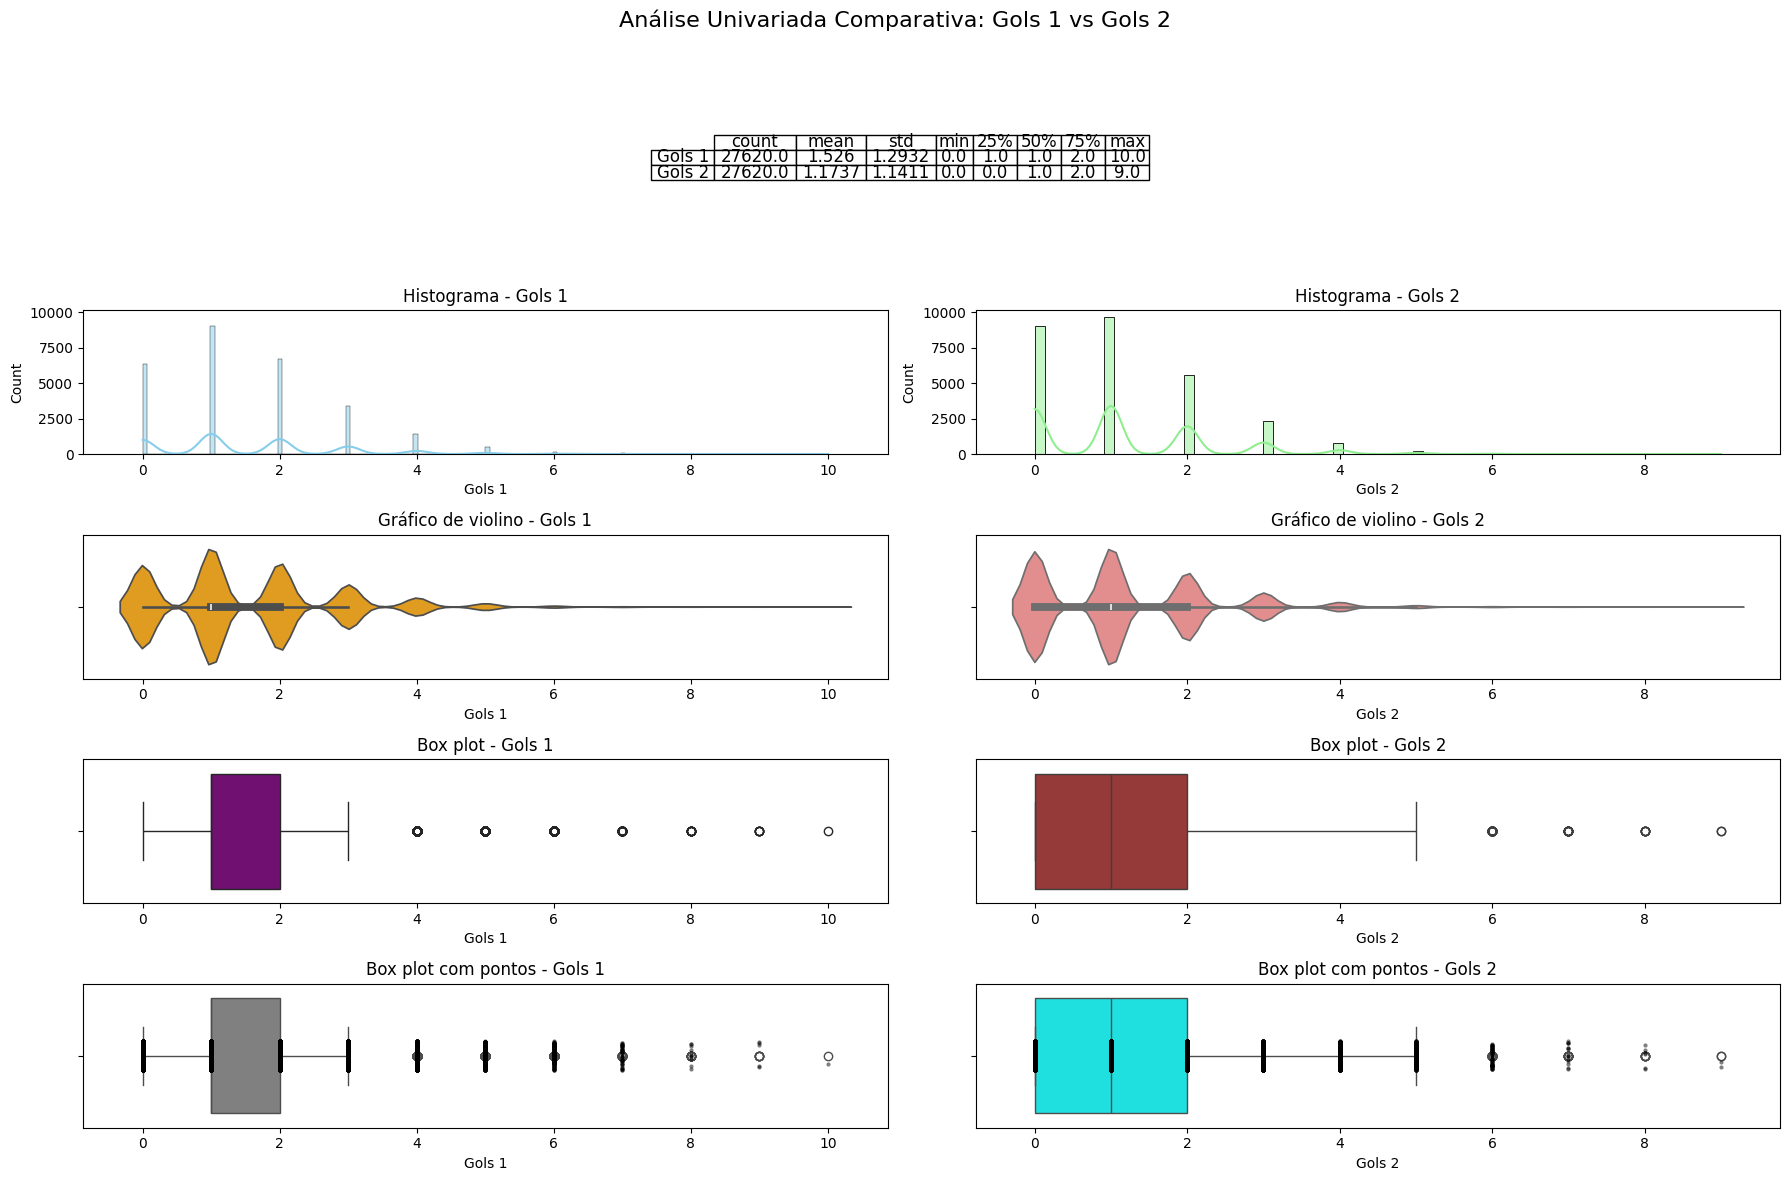

In [174]:
univariada_variavel_numerica(games, ['Gols 1', 'Gols 2'])

- A distribuição de gols é assimétrica a direita
- É possível perceber que times da casa possuem menos partidas com 0 gols, e com uma média de 1.52, mas uma mediana de 1.29, revelando que há um número significativo de partidas com 2 gols além de partidas com 1 gol
- Já para times visitantes, claramente a tendência é de 1 gol por partida, e no Q1 não há gols.
- Porém, Q3 é 2 para ambas as colunas, revelando que a maioria das partidas terão até 2 gols por time.
- Porém, enquanto times da casa apresentam outliers acima de 3 gols, times visitantes apresentam outliers apenas a partir de 5 gols.

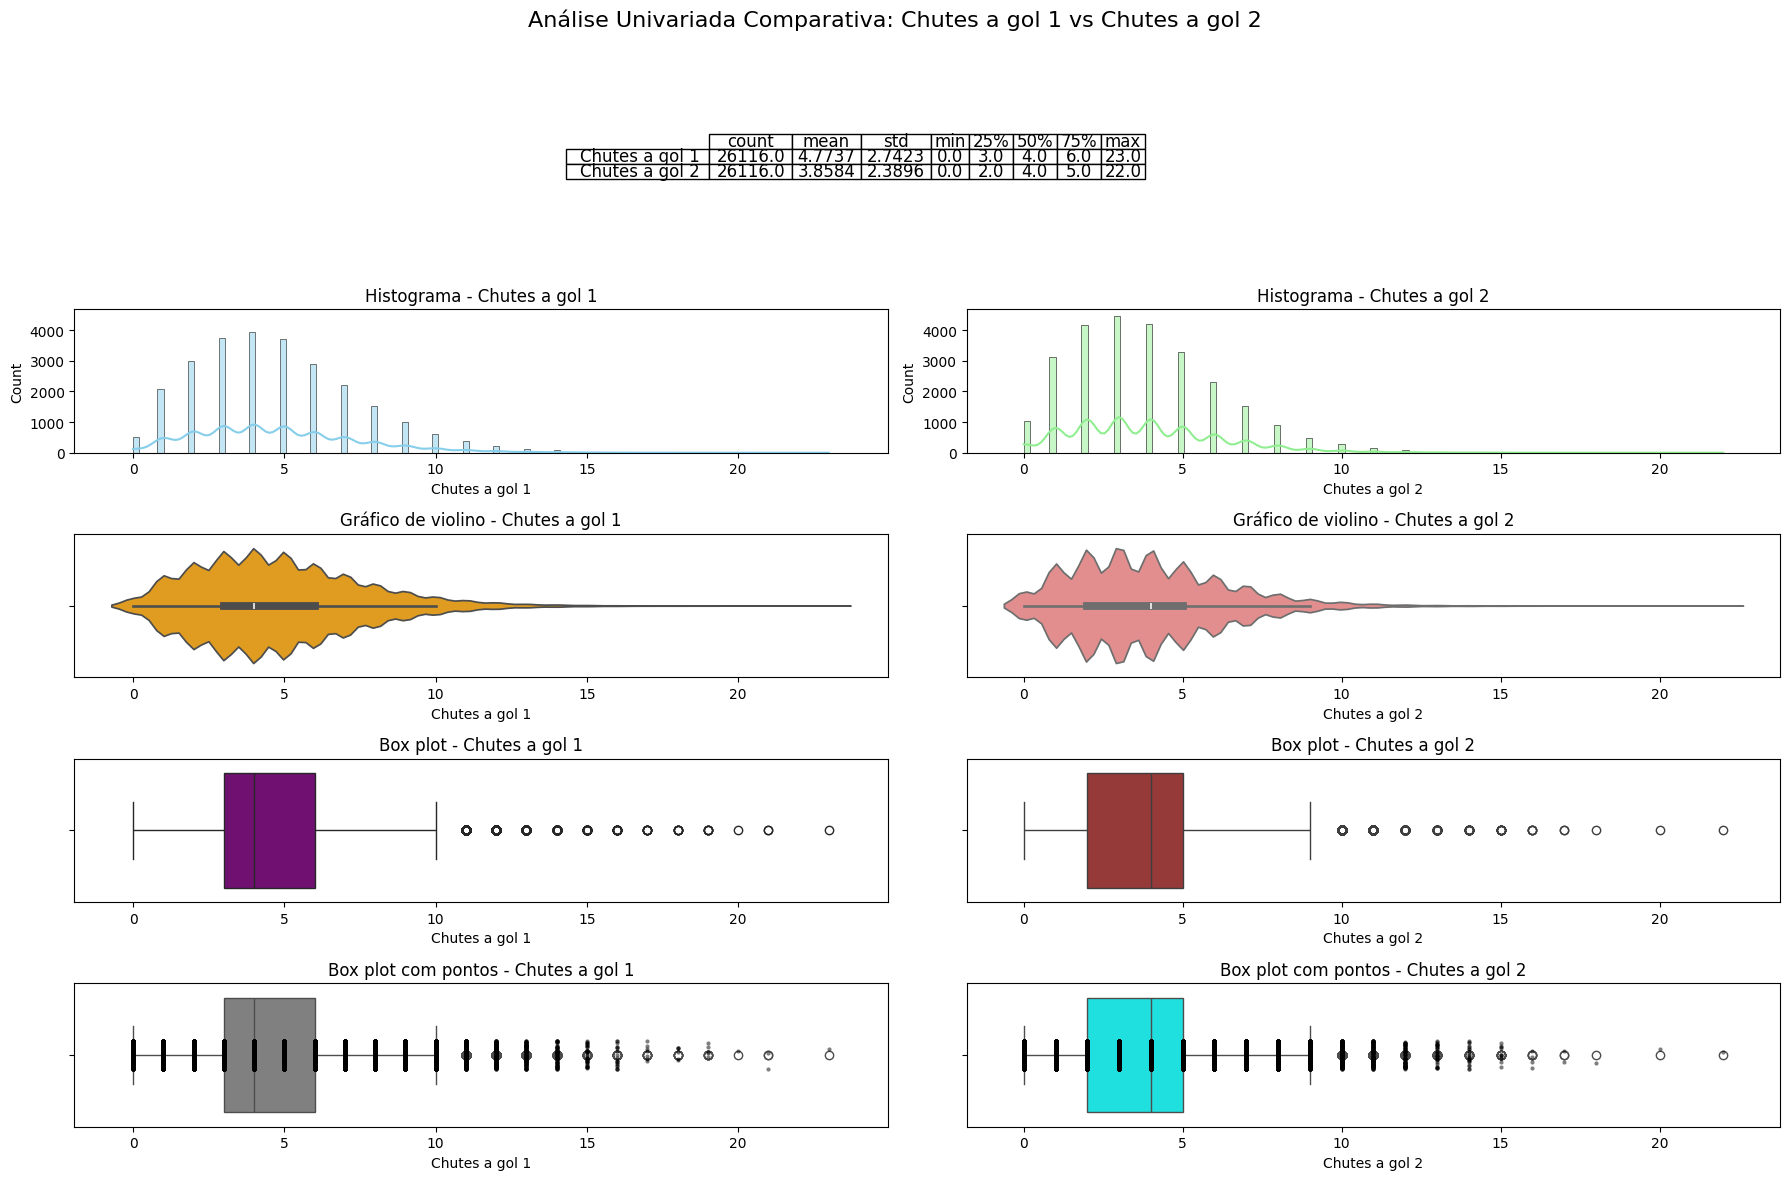

In [175]:
univariada_variavel_numerica(games, ['Chutes a gol 1', 'Chutes a gol 2'])

- A distribuição de chutes a gol é assimétrica para a direita
- A média de chutes a gol por partida é de 4 para as duas colunas, mas claramente há uma tendência maior de chutes a gol pelos times da casa
- Para 50% dos dados, há 4 chutes a gol por partida
- Aqui também se observa uma distribuição mais concentrada para times da casa, enquanto times visitantes possuem mais outliers

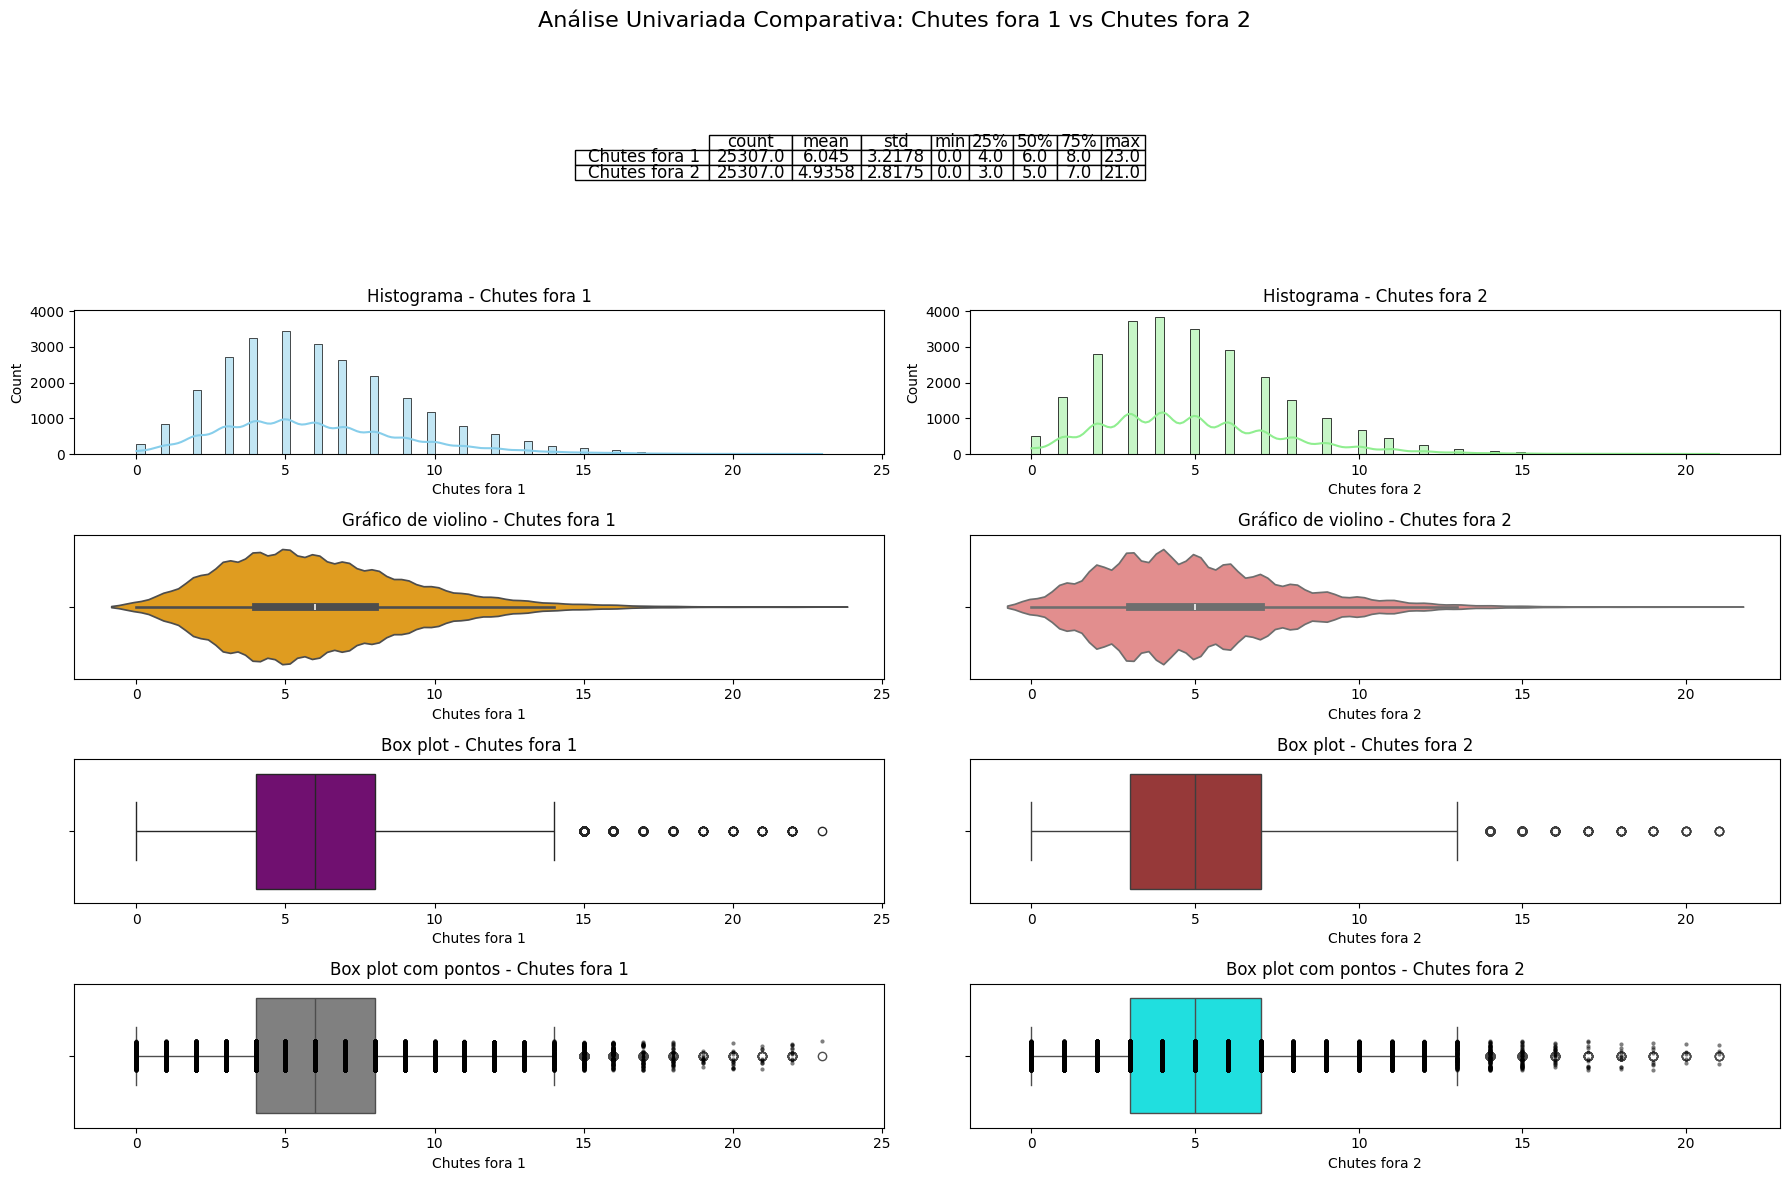

In [176]:
univariada_variavel_numerica(games, ['Chutes fora 1', 'Chutes fora 2'])

- A distribuição dos dados é assimétrica a direita, mas o valor de 748 chutes para fora não faz o menor sentido, então removemos esta linha.
- A média de chutes para fora é de 6 para o time da casa e 5 para o visitante, com o valor mais frequente sendo 5 para o time da casa e 4 para o visitante.
- Aqui podemos assumir uma leve tendência de tentativas a mais para o time da casa que o time visitante, com pouca diferença entre os dados.

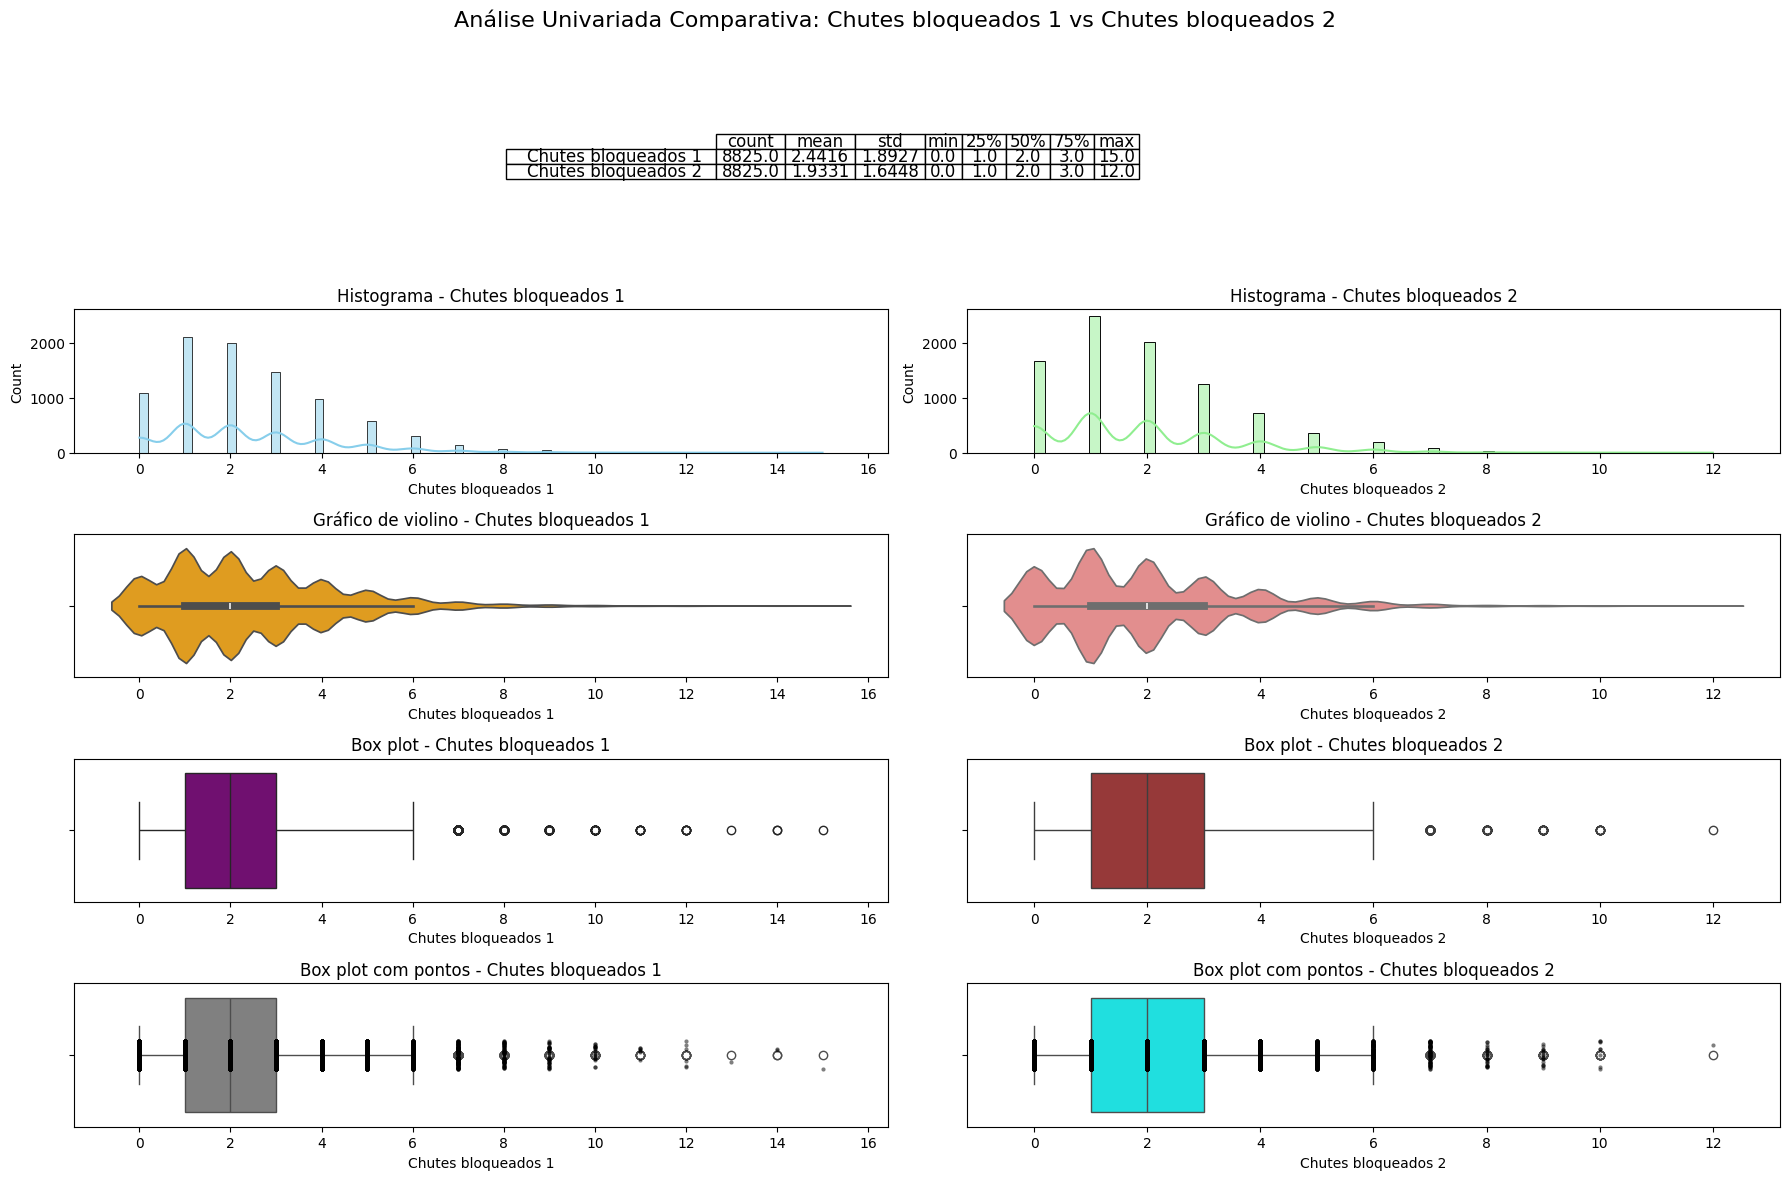

In [177]:
univariada_variavel_numerica(games, ['Chutes bloqueados 1', 'Chutes bloqueados 2'])

- Aqui já podemos ver que o comportamento é muito similar, com a média levemente maior para os times da casa por conta dos outliers, mas a mediana é muito próxima, e os valores do IQR também.
- Q2 exibe 2 chutes bloqueados por partida, com uma tendência levemente maior do número de bloqueios por parte dos times da casa

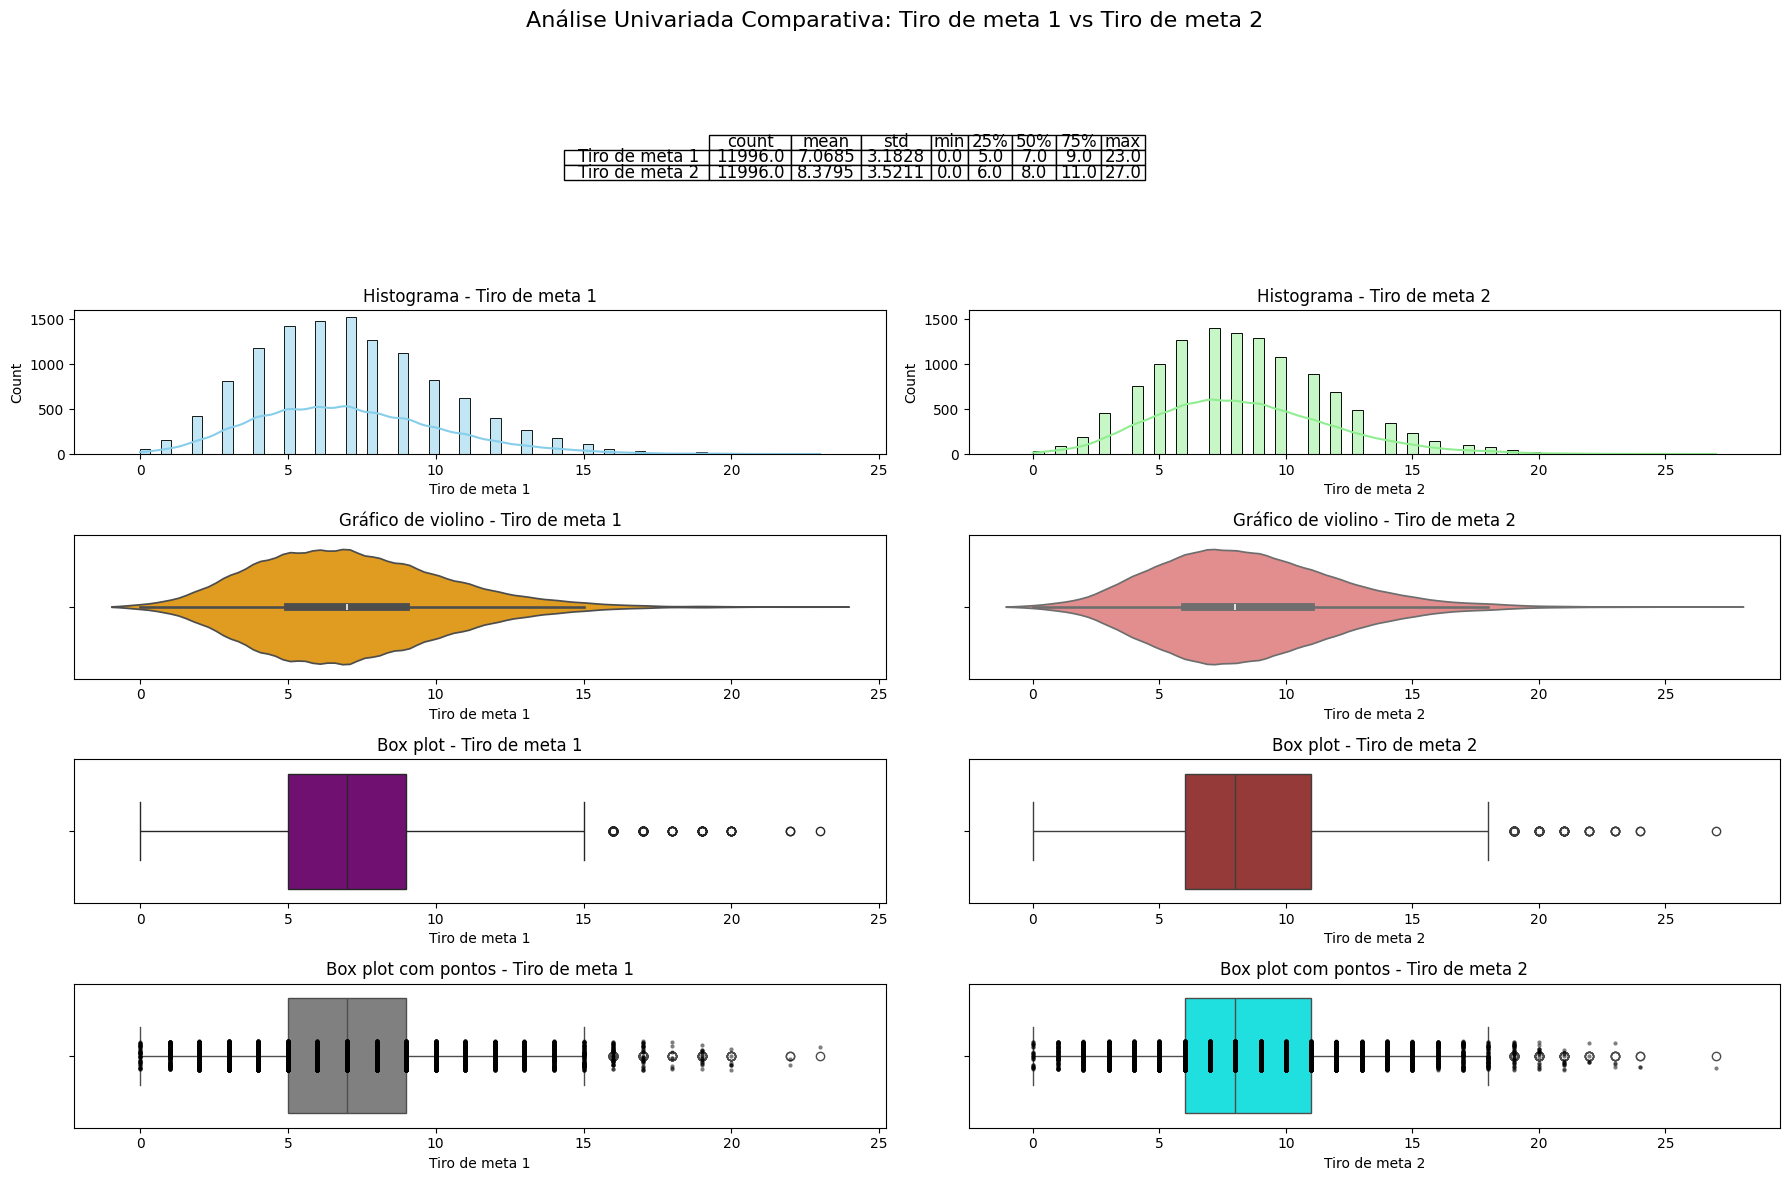

In [178]:
univariada_variavel_numerica(games, ['Tiro de meta 1', 'Tiro de meta 2'])

- Já para os tiros de meta podemos ver uma distribuição assimétrica a direita e claramente uma tendência maior dos times visitantes de cobrarem mais tiros de meta, o que está de acordo com a tendência de maior tentativa e número de gols por parte dos times da casa, como foi visto nas análises anteriores.
- Há uma média de 7 tiros de meta para o time da casa e 8 para o time visitante, com uma mediana de 3 para ambos.
- Podemos ver que nem todos os tiros de meta são resultantes de chutes para fora, o que podem ser chutes de muito longe, chutes bloqueados pelo próprio time, disputas na linha de fundo, pênaltis perdidos, etc.

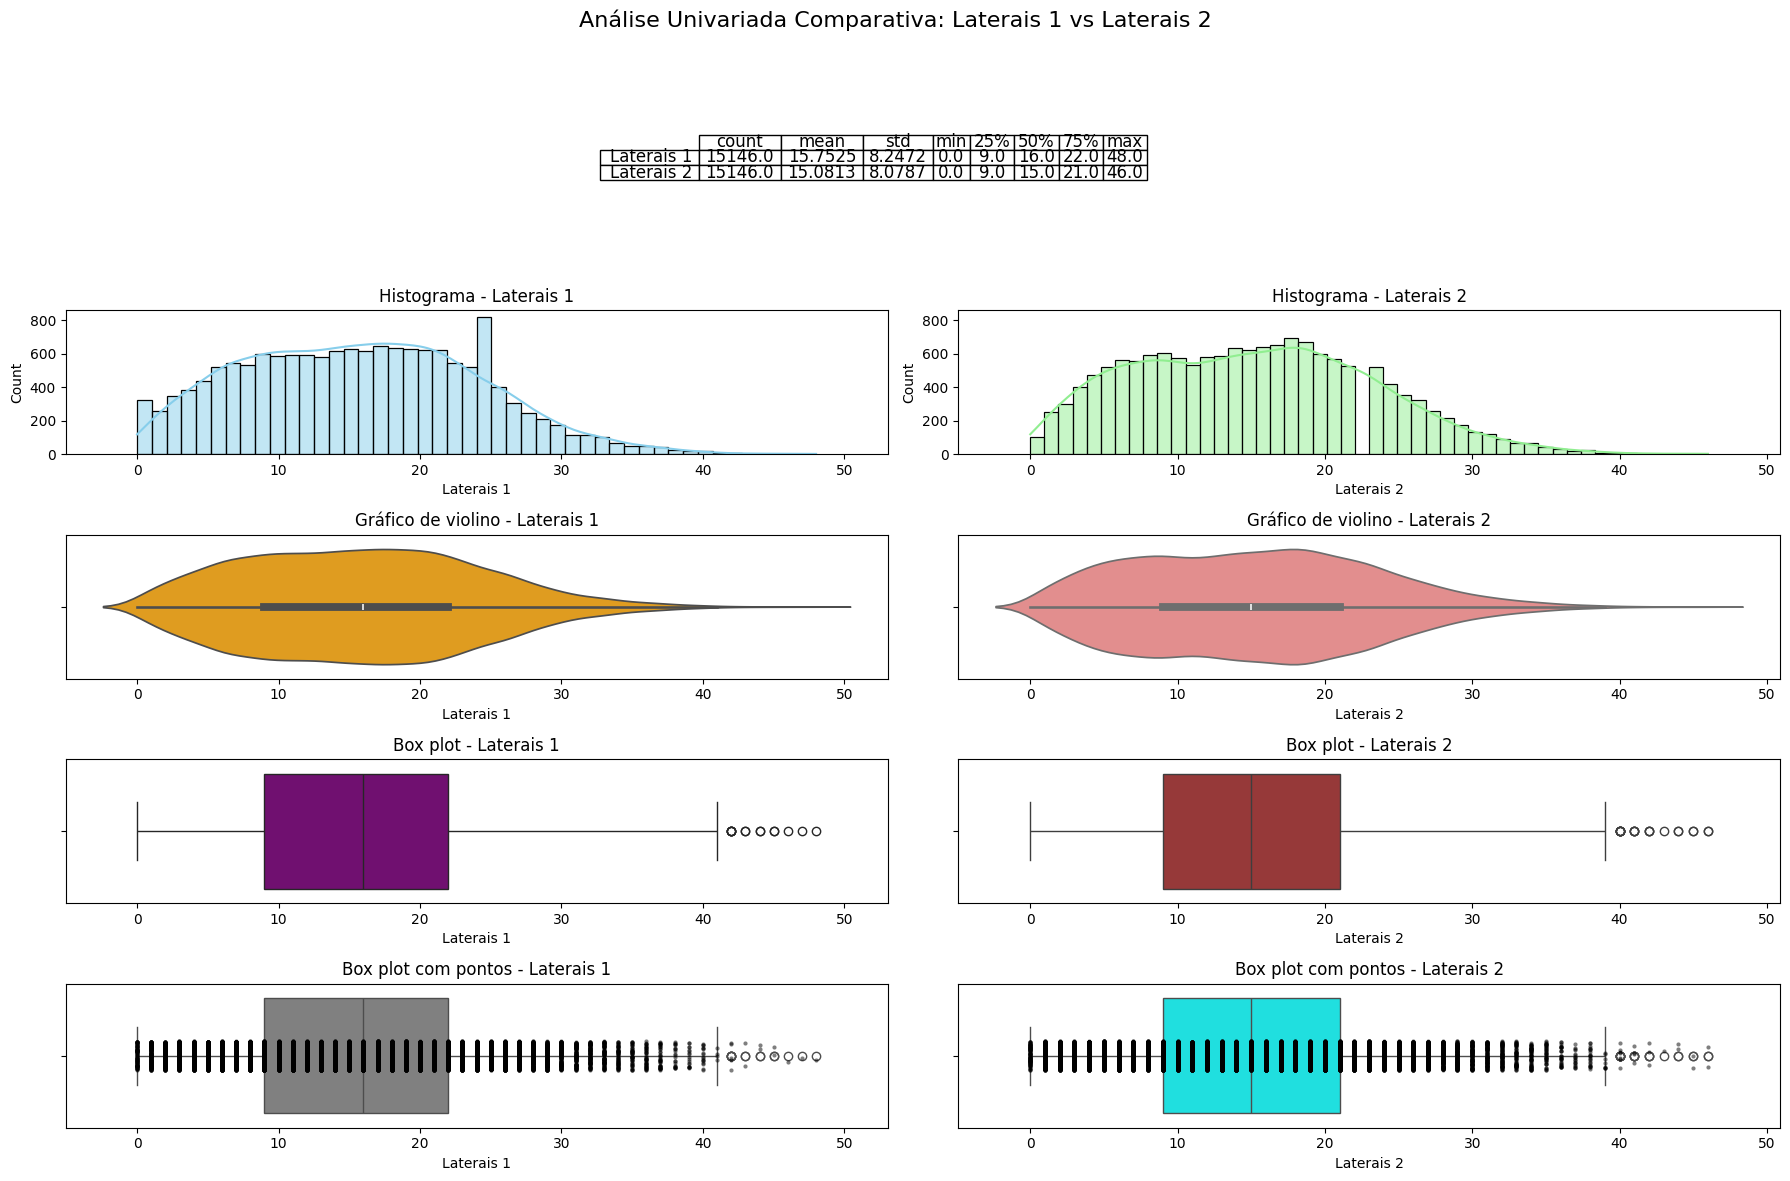

In [179]:
univariada_variavel_numerica(games, ['Laterais 1', 'Laterais 2'])

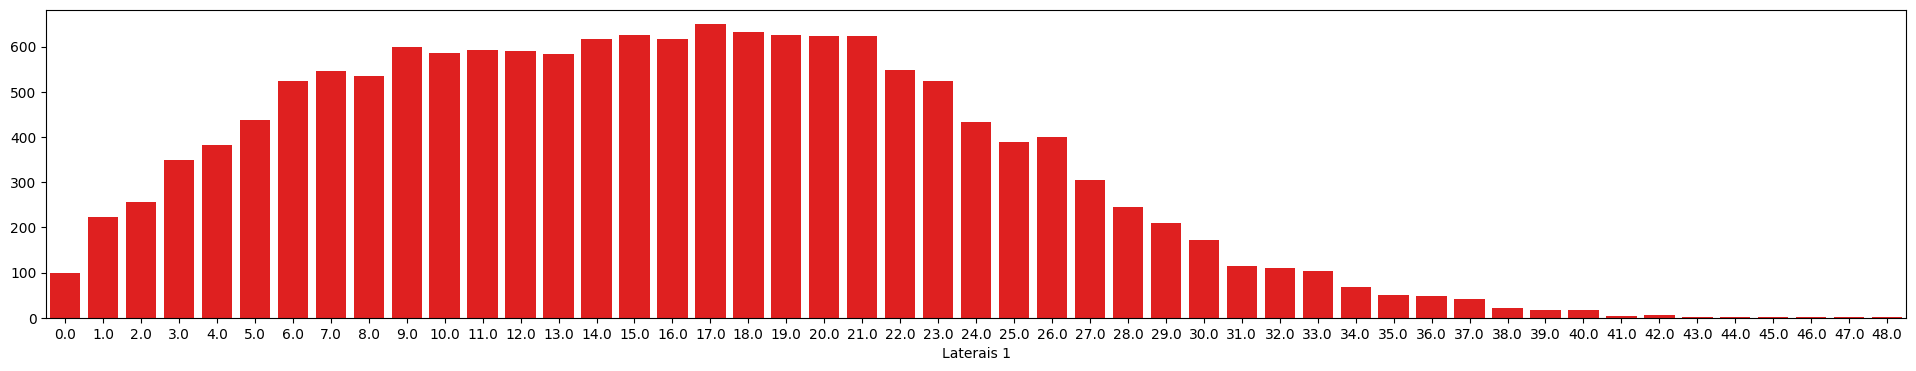

In [180]:
laterais_casa = games['Laterais 1'].value_counts().sort_index()
laterais_fora = games['Laterais 2'].value_counts().sort_index()

plt.figure(figsize=(24, 4))
sns.barplot(x=laterais_casa.index, y=laterais_casa.values, color='red')
plt.show()


# sns.barplot(x=laterais_fora.index, y=laterais_fora.values, color='red')

- É possível ver que houve um erro de plotagem no gráfico do histograma para as laterais
- Os números de laterais são levemente maiores para os times da casa, mas não há uma diferença tão explícita
- Faz sentido contando a marcação dos times visitantes e a tendência do time da casa de ter um ataque mais forte
- Provavelmente vai aparecer com os dados de faltas

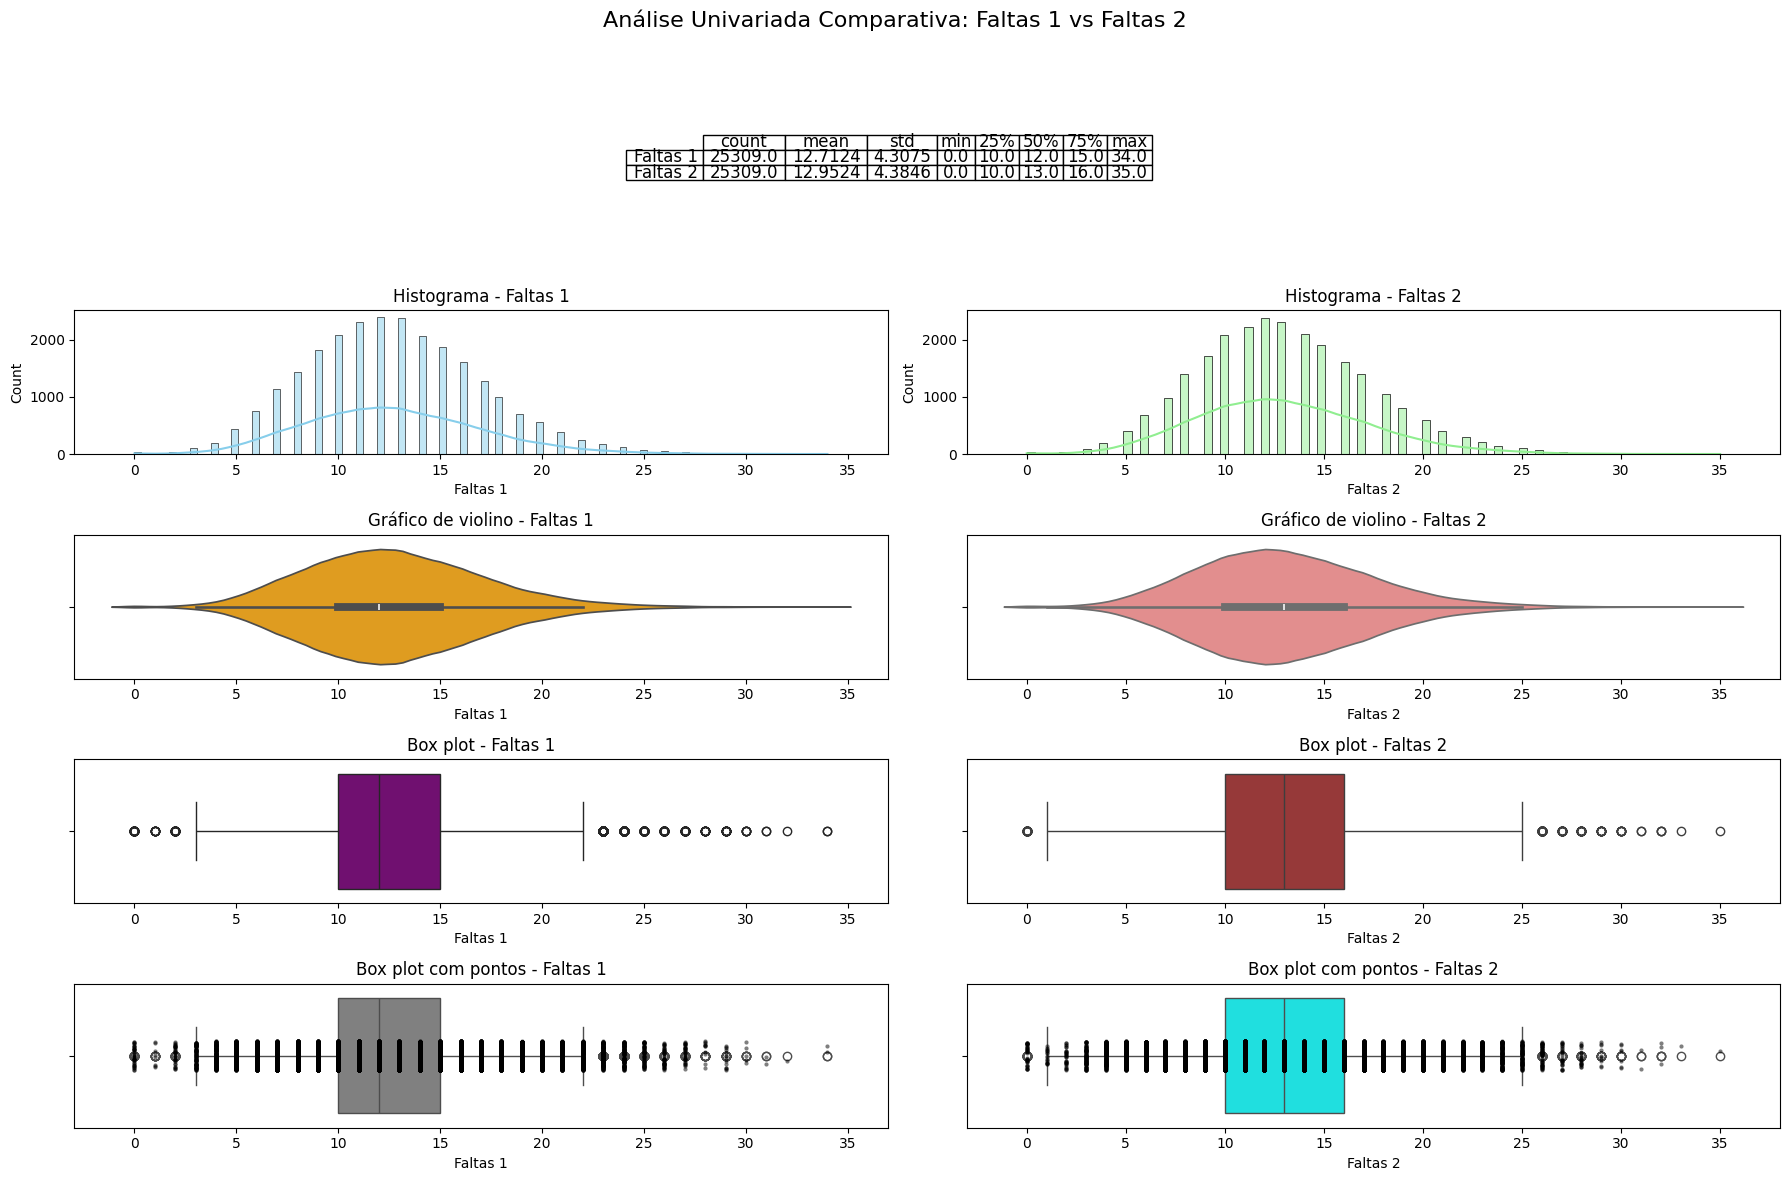

In [181]:
univariada_variavel_numerica(games, ['Faltas 1', 'Faltas 2'])

- Removemos alguns outliers para ambas as colunas
- Na verdade, a média e mediana não é muito diferente para os times da casa e visitantes, com um IQR bem próximo para todas as faixas
- Então dá pra concluir que as laterais não tem muita relação com faltas, e pode estar mais relacionado com outros dados que indiquem defesa
- Todos os times cometem faltas no jogo, podendo ver que há outliers até 3/4 faltas e após 25/26 faltas
- Em média, ambos os times marcam uma quantidade similar de faltas.

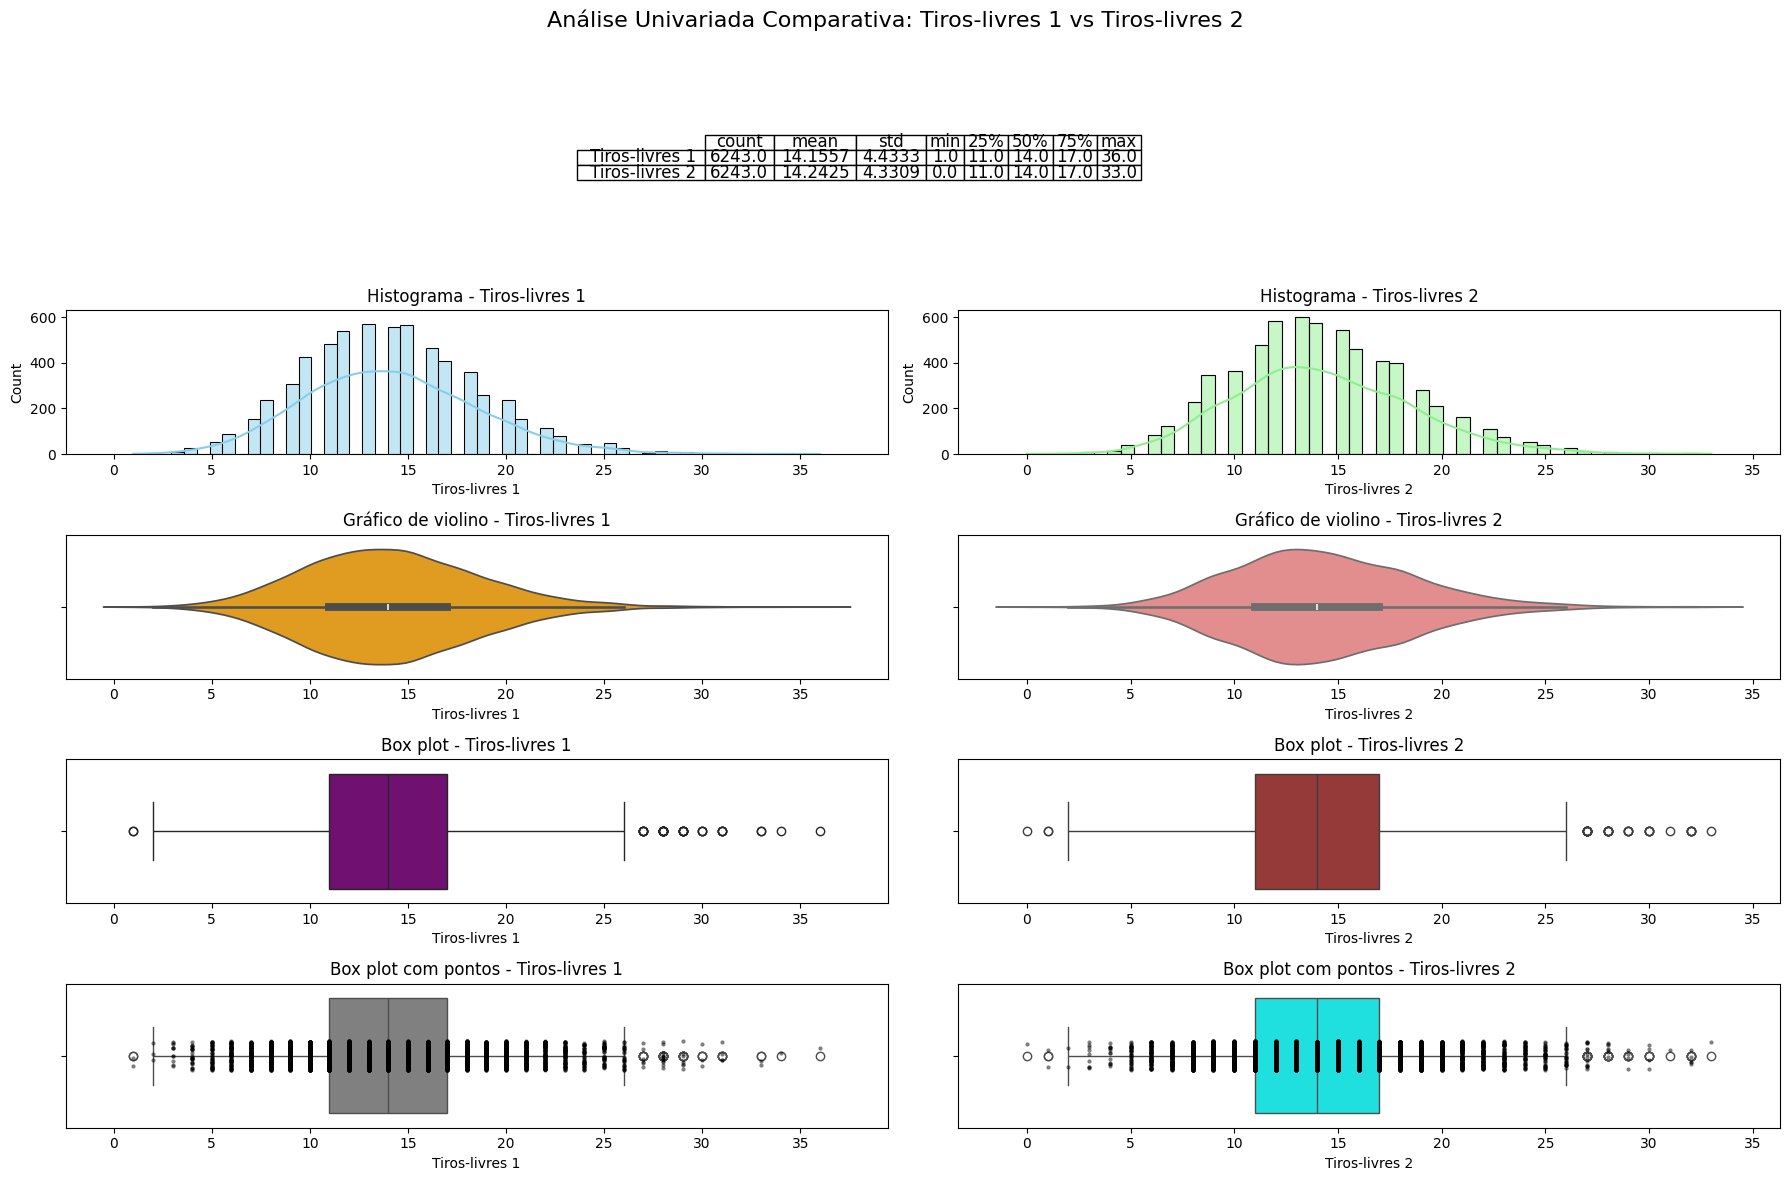

In [182]:
univariada_variavel_numerica(games, ['Tiros-livres 1', 'Tiros-livres 2'])

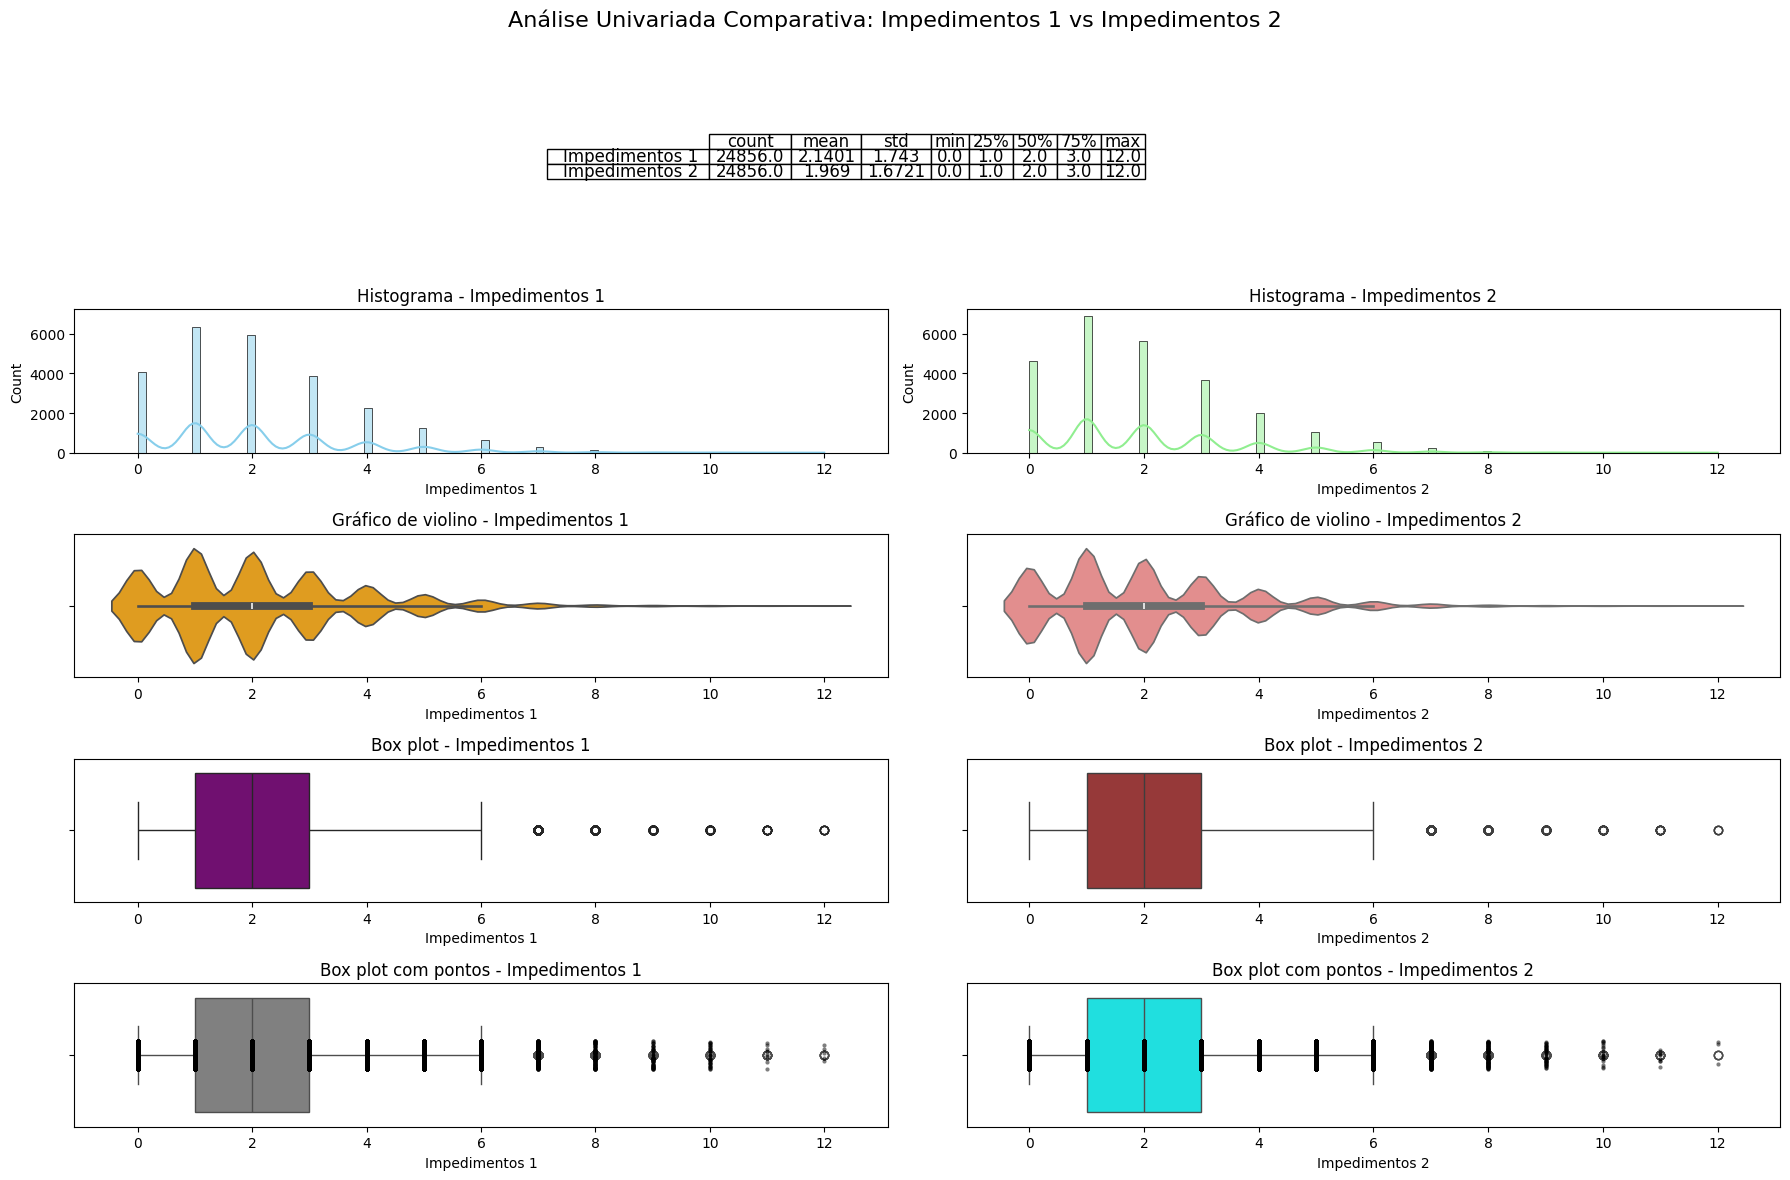

In [183]:
univariada_variavel_numerica(games, ['Impedimentos 1', 'Impedimentos 2'])

In [184]:
impedimentos_1_count = games['Impedimentos 1'].value_counts().sort_index()

# Calculate the percentage of value counts for the column 'Impedimentos 1'
impedimentos_1_percentage = (impedimentos_1_count / impedimentos_1_count.sum()) * 100

# Create a DataFrame to display the counts and percentages
impedimentos_1_table = pd.DataFrame({
    'Count': impedimentos_1_count.values,
    'Percentage (%)': impedimentos_1_percentage.values
}, index=impedimentos_1_count.index).sort_values(by='Count', ascending=False)
    
# Display the table
impedimentos_1_table

,Count,Percentage (%)
Impedimentos 1,,
1.0,6321,25.430480
2.0,5911,23.780978
0.0,4051,16.297876
3.0,3868,15.561635
4.0,2246,9.036048
5.0,1252,5.037013
6.0,663,2.667364
7.0,310,1.247184
8.0,122,0.490827


In [185]:
impedimentos_2_count = games['Impedimentos 2'].value_counts().sort_index()

# Calculate the percentage of value counts for the column 'Impedimentos 1'
impedimentos_2_percentage = (impedimentos_2_count / impedimentos_2_count.sum()) * 100

# Create a DataFrame to display the counts and percentages
impedimentos_2_table = pd.DataFrame({
    'Count': impedimentos_2_count.values,
    'Percentage (%)': impedimentos_2_percentage.values
}, index=impedimentos_2_count.index).sort_values(by='Count', ascending=False)
    
# Display the table
impedimentos_2_table

,Count,Percentage (%)
Impedimentos 2,,
1.0,6891,27.723688
2.0,5650,22.730930
0.0,4641,18.671548
3.0,3645,14.664467
4.0,2011,8.090602
5.0,1064,4.280657
6.0,531,2.136305
7.0,244,0.981654
8.0,102,0.410364


- Aqui, novamente, outliers com valores acima de 12 não fazem sentido, e foram removidos
- As médias são praticamente as mesmas, com IQR igual para ambos times da casa e visitantes
- Apenas é possível ver uma leve tendência para os times da casa, o que faz sentido com a hipótese de maior performance por parte dos times da casa num geral

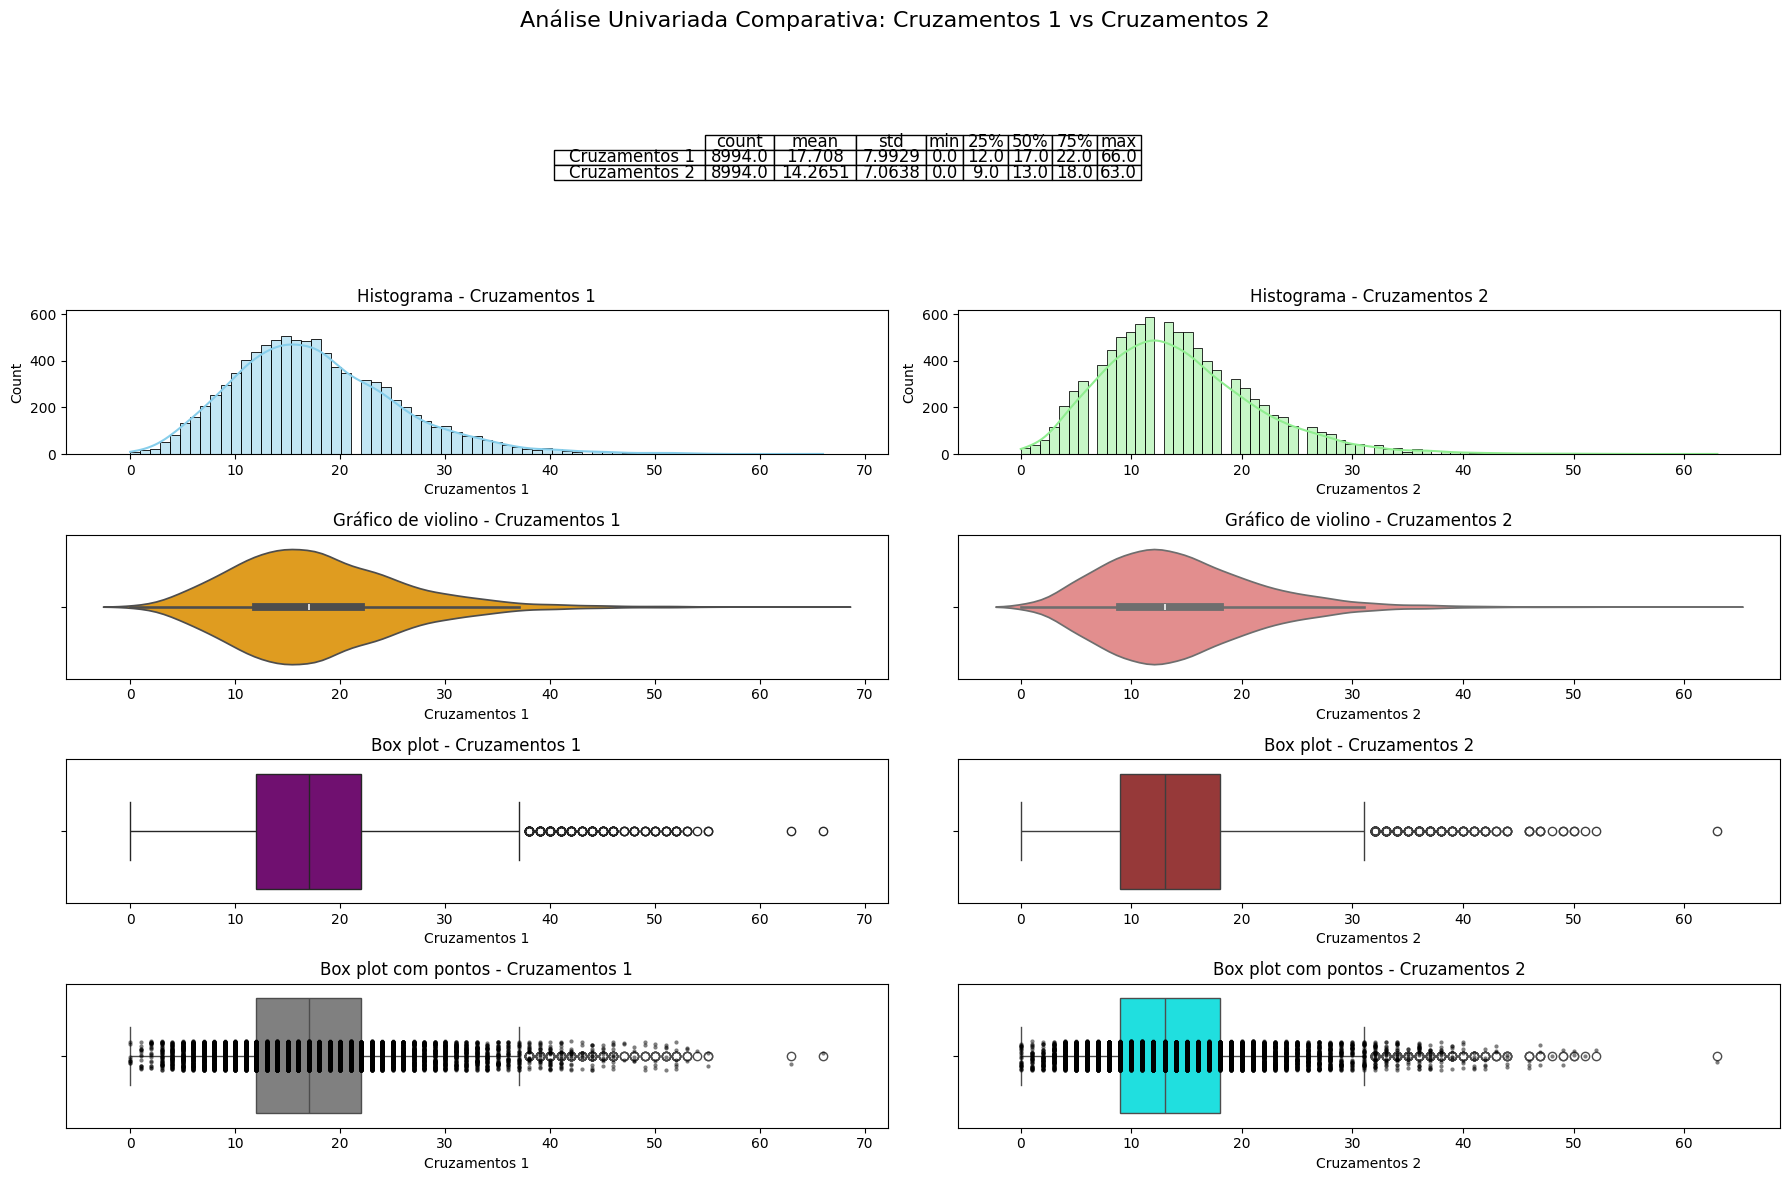

In [186]:
univariada_variavel_numerica(games, ['Cruzamentos 1', 'Cruzamentos 2'])

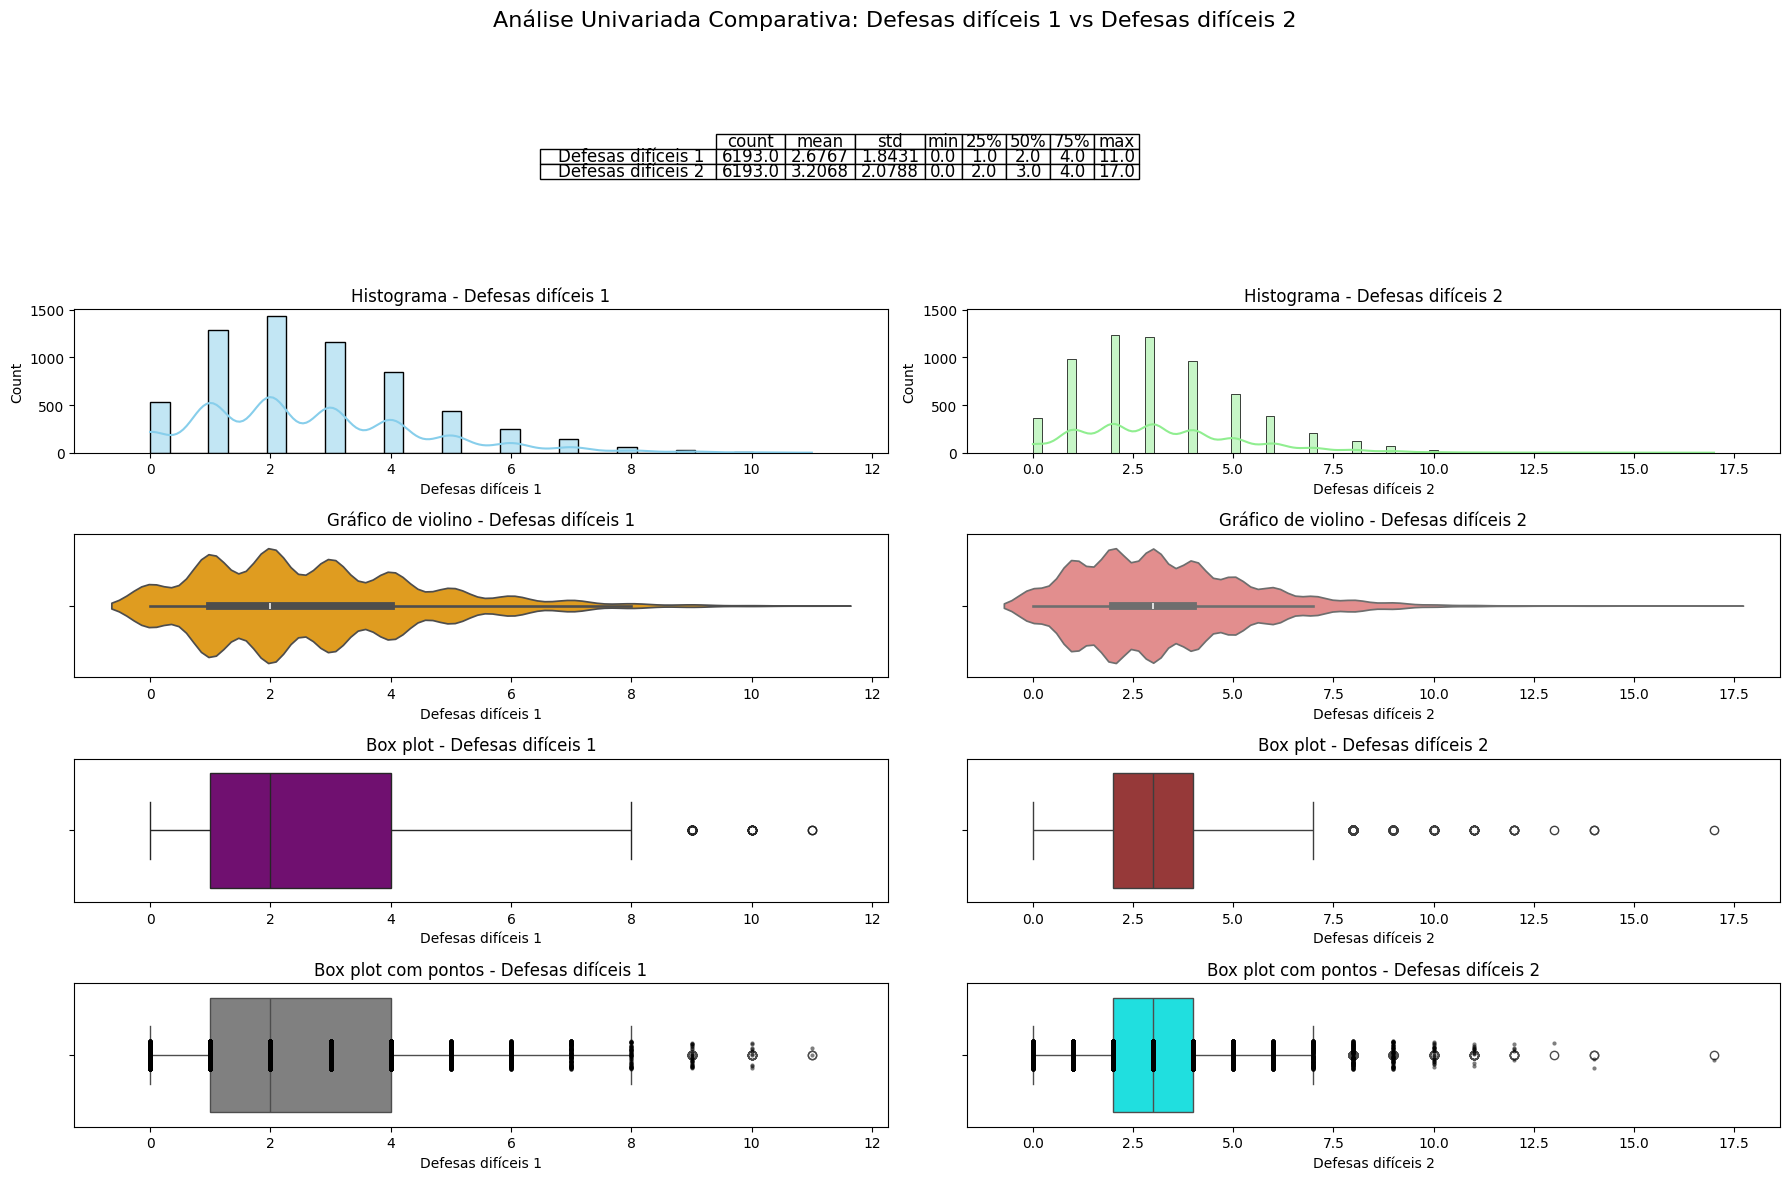

In [187]:
univariada_variavel_numerica(games, ['Defesas difíceis 1', 'Defesas difíceis 2'])

Aviso: Uma ou ambas as variáveis 'Cartões amarelos 1', 'Cartões amarelos 2' podem não ser categóricas. Tentando analisar mesmo assim.
--- Análise Univariada para Variável Categórica: Cartões amarelos 1 ---
Describe da variável categórica: Cartões amarelos 1


C:\Users\carlo\AppData\Local\Temp\ipykernel_22196\1266949783.py:173: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (ptypes.is_object_dtype(dado[var1]) or ptypes.is_categorical_dtype(dado[var1])) or \


,count,mean,std,min,25%,50%,75%,max
Cartões amarelos 1,27620.0,1.862382,1.355063,0.0,1.0,2.0,3.0,11.0


Tabela de frequência da variável categórica (com percentuais e total): Cartões amarelos 1


,Cartões amarelos 1,Frequência,Percentual (%)
0,1.0,7601,27.52
1,2.0,7527,27.25
2,3.0,4755,17.22
3,0.0,4459,16.14
4,4.0,2217,8.03
5,5.0,792,2.87
6,6.0,211,0.76
7,7.0,43,0.16
8,8.0,13,0.05
9,11.0,1,0.00



--- Análise Univariada para Variável Categórica: Cartões amarelos 2 ---
Describe da variável categórica: Cartões amarelos 2


,count,mean,std,min,25%,50%,75%,max
Cartões amarelos 2,27620.0,2.122085,1.412553,0.0,1.0,2.0,3.0,10.0


Tabela de frequência da variável categórica (com percentuais e total): Cartões amarelos 2


,Cartões amarelos 2,Frequência,Percentual (%)
0,2.0,7547,27.32
1,1.0,6659,24.11
2,3.0,5708,20.67
3,0.0,3310,11.98
4,4.0,2839,10.28
5,5.0,1113,4.03
6,6.0,325,1.18
7,7.0,98,0.35
8,8.0,13,0.05
9,9.0,6,0.02



--- Gráficos de Frequência Lado a Lado ---


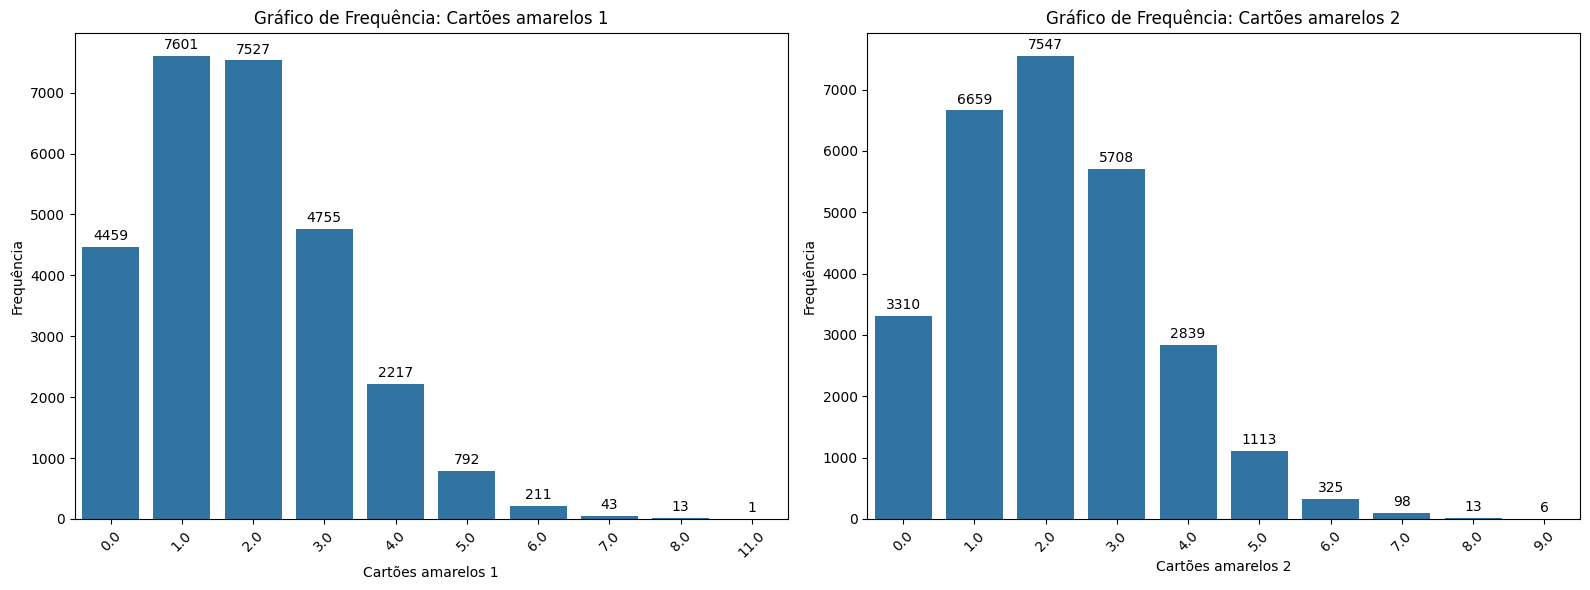

In [188]:
univariada_variavel_categoria(games, ['Cartões amarelos 1', 'Cartões amarelos 2'])

Aviso: Uma ou ambas as variáveis 'Cartões vermelhos 1', 'Cartões vermelhos 2' podem não ser categóricas. Tentando analisar mesmo assim.
--- Análise Univariada para Variável Categórica: Cartões vermelhos 1 ---
Describe da variável categórica: Cartões vermelhos 1


C:\Users\carlo\AppData\Local\Temp\ipykernel_22196\1266949783.py:173: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (ptypes.is_object_dtype(dado[var1]) or ptypes.is_categorical_dtype(dado[var1])) or \


,count,mean,std,min,25%,50%,75%,max
Cartões vermelhos 1,27620.0,0.04971,0.225525,0.0,0.0,0.0,0.0,3.0


Tabela de frequência da variável categórica (com percentuais e total): Cartões vermelhos 1


,Cartões vermelhos 1,Frequência,Percentual (%)
0,0.0,26296,95.21
1,1.0,1276,4.62
2,2.0,47,0.17
3,3.0,1,0.00
4,Total,27620,100.00



--- Análise Univariada para Variável Categórica: Cartões vermelhos 2 ---
Describe da variável categórica: Cartões vermelhos 2


,count,mean,std,min,25%,50%,75%,max
Cartões vermelhos 2,27620.0,0.058617,0.247519,0.0,0.0,0.0,0.0,4.0


Tabela de frequência da variável categórica (com percentuais e total): Cartões vermelhos 2


,Cartões vermelhos 2,Frequência,Percentual (%)
0,0.0,26080,94.42
1,1.0,1465,5.30
2,2.0,72,0.26
3,3.0,2,0.01
4,4.0,1,0.00
5,Total,27620,100.00



--- Gráficos de Frequência Lado a Lado ---


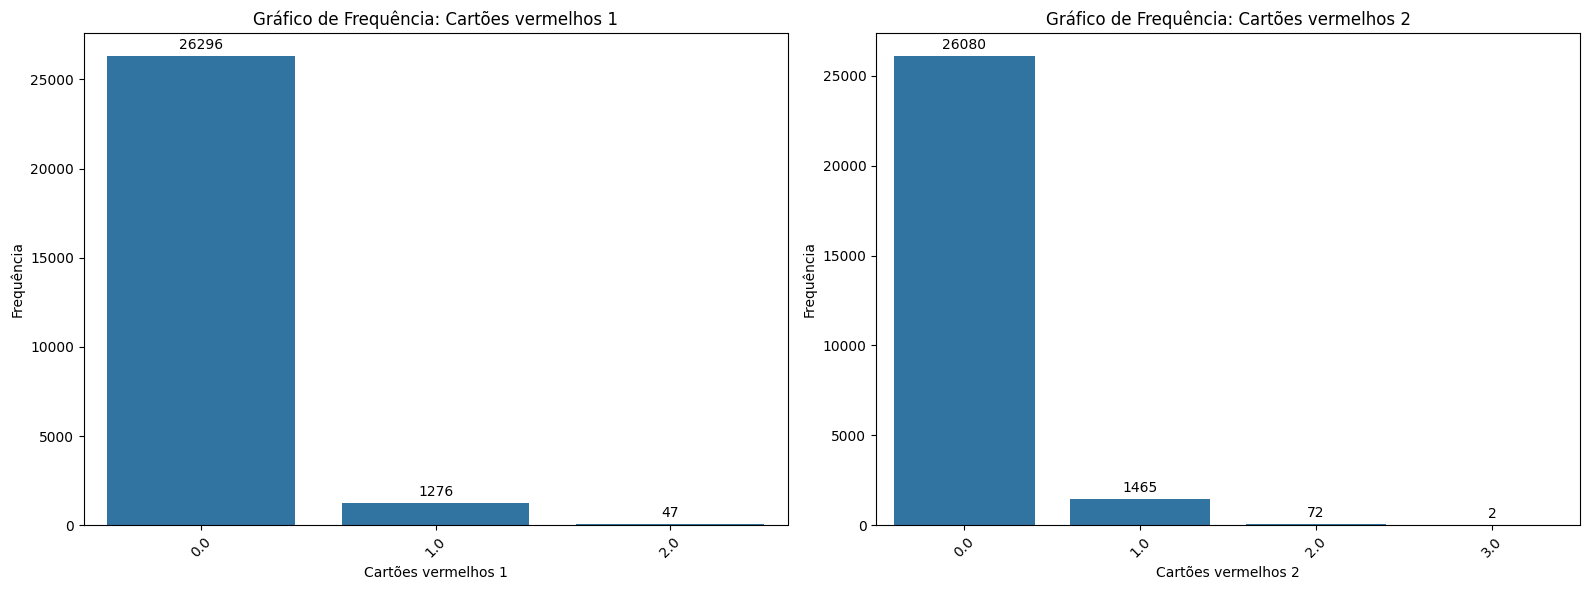

In [189]:
univariada_variavel_categoria(games, ['Cartões vermelhos 1', 'Cartões vermelhos 2'])

- Tem como usar essas variáveis como categóricas? Por exemplo, "houve cartão vermelho" para cartões vermelhos, e "0", "1-2", "3+" para cartões amarelos
- Classificando de forma categórica, mesmo que times visitantes recebam uma maior quantidade de cartões amarelos, o comportamento é similar o suficiente para entendermos estatísticas como "0-1", "2-3", "4+" cartões amarelos, ou "0", "1-2", "3+" cartões amarelos por jogo.
- O que acontece em jogos que possuem mais de 3 cartões amarelos?
- Cartões vermelhos provavelmente podem ser tratados como categóricos, já que é facilmente observável o mesmo padrão para ambos os times, simplificanto a abordagem para "houve cartão vermelho?".
- O que acontece em jogos que possuem 1 cartão vermelho?

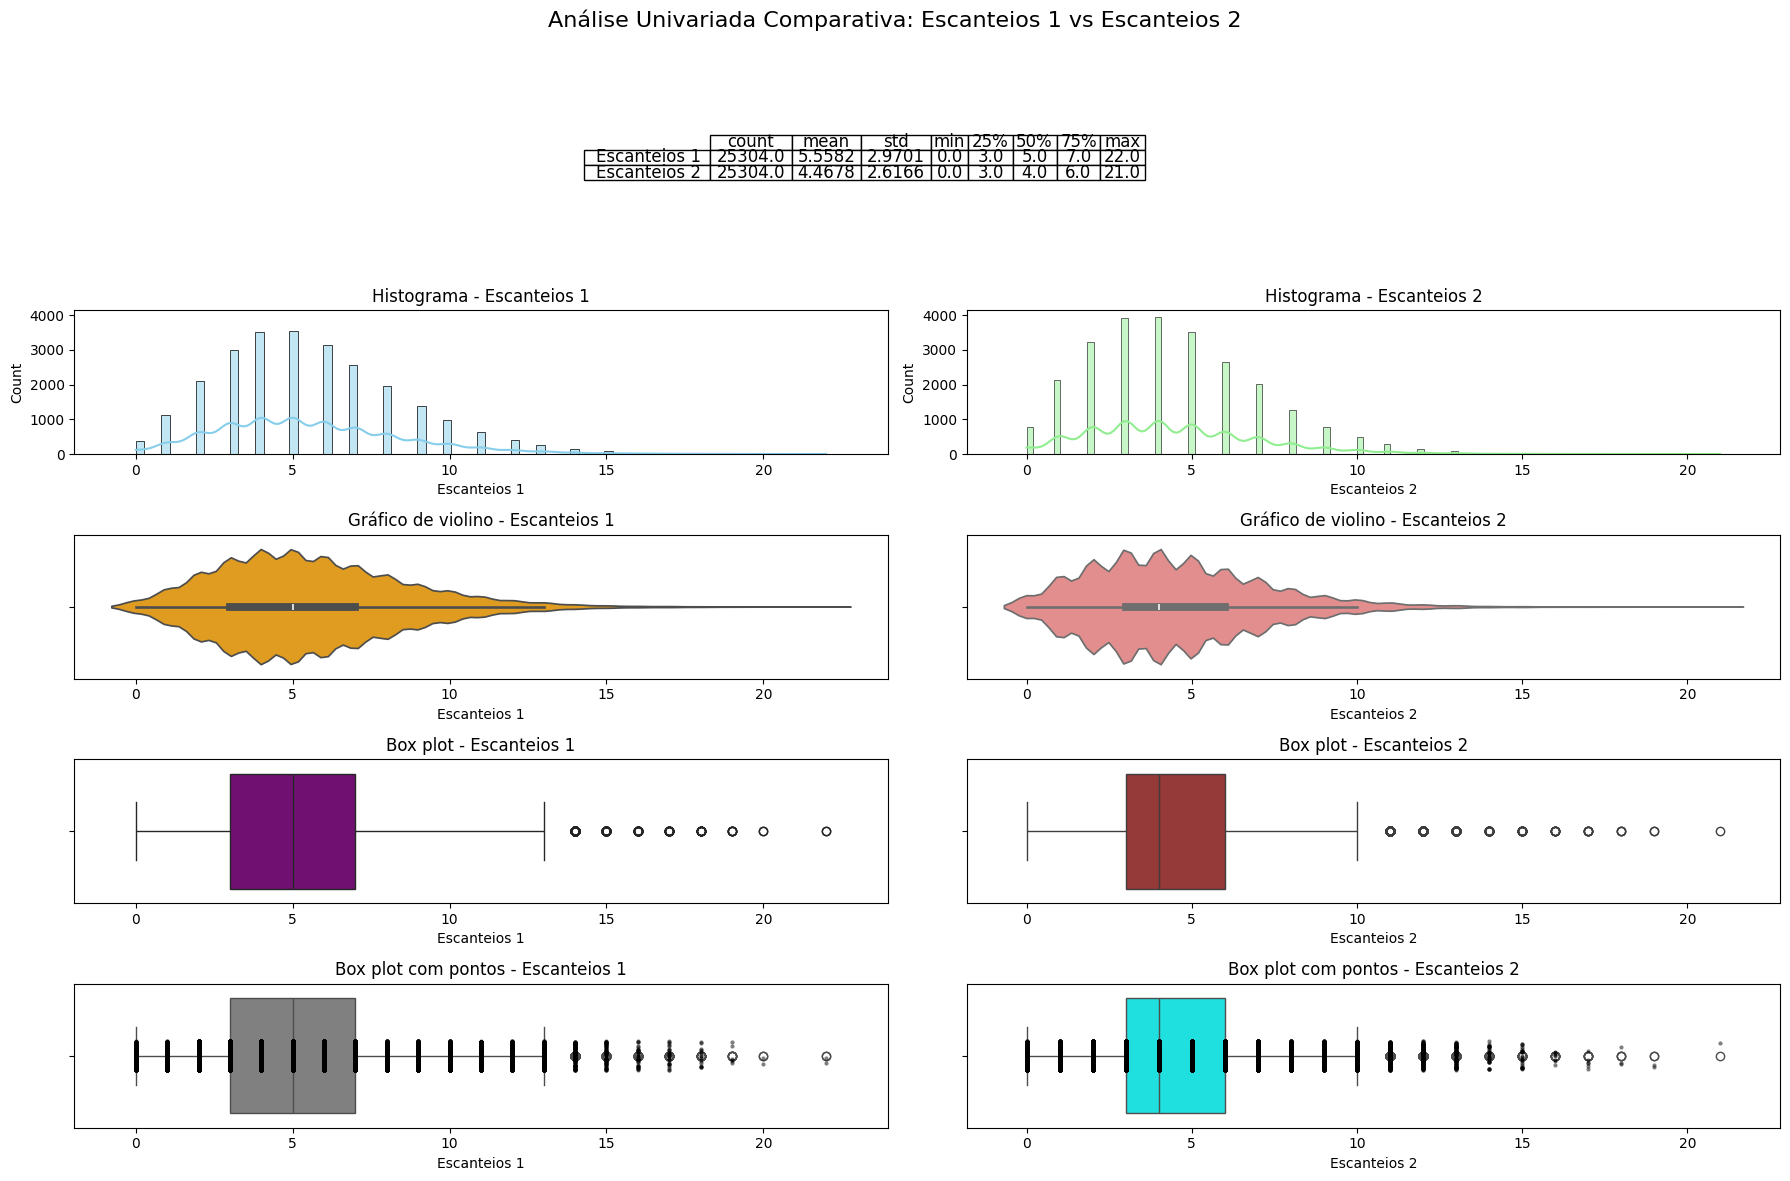

In [190]:
univariada_variavel_numerica(games, ['Escanteios 1', 'Escanteios 2'])

Podemos ver uma tendência de 5.5 escanteios por jogo do time da casa, e 4.5 do time visitante, novamente com uma maior tendência de atuação de ataque pelo time da casa, o que é bem exibido pelos IQRs. Qual a relação dos escanteios com os chutes no gol? E com o número de gols? Métricas de ataque num geral?

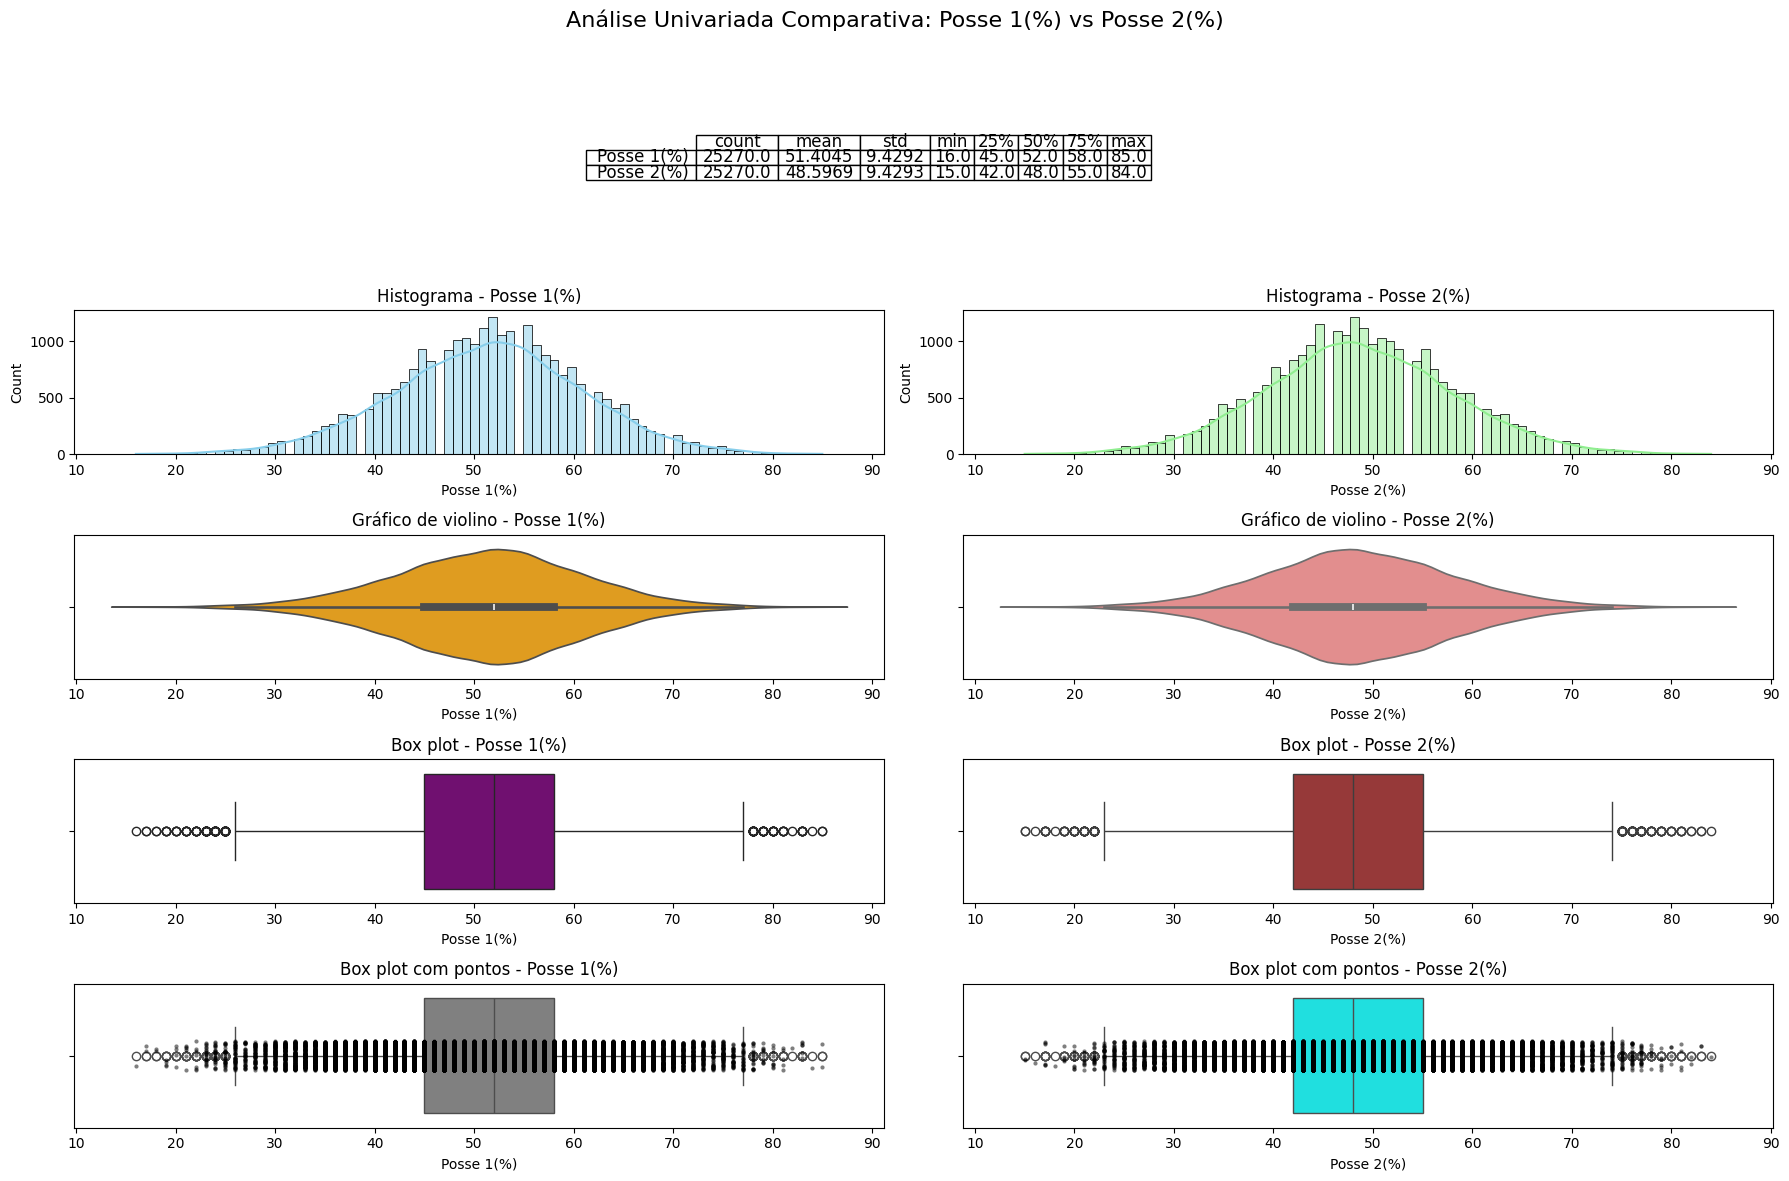

In [191]:
univariada_variavel_numerica(games, ['Posse 1(%)', 'Posse 2(%)'])

- O boxplot já exibe uma clara tendência de outliers para os 15% iniciais e finais de cada gráfico. Como não faz sentido considerar jogos com 0% ou 100% de posse por algum time, e há uma clara concentração de outliers nesta faixa, estes valores foram removidos.
- Na posse de bola é possível ver claramente a assimetria entre times da casa e visitantes: o gráfico dos times da casa é assimétrico a esquerda, e o dos times visitantes é assimétrico a direita, revelando que os times da casa possuem uma tendência de maiores atuações durante o jogo
- A posse se associa com algum parâmetro de desempenho? Ou possui apenas uma relação direta com maiores tentativas? Considerando apenas os valores na média, faz alguma diferença?

--- Análise Univariada para Variável Categórica: Time 1 ---
Describe da variável categórica: Time 1


,count,unique,top,freq
Time 1,27620,310,Roma,240


Tabela de frequência da variável categórica (com percentuais e total): Time 1


,Time 1,Frequência,Percentual (%)
0,Roma,240,0.87
1,Tottenham,239,0.87
2,Juventus,239,0.87
3,Napoli,239,0.87
4,Milan,239,0.87
...,...,...,...
306,NFC Volos,9,0.03
307,Freiburg,8,0.03
308,Hertha Berlim,8,0.03
309,Ionikos,7,0.03



--- Análise Univariada para Variável Categórica: Time 2 ---
Describe da variável categórica: Time 2


,count,unique,top,freq
Time 2,27620,310,Liverpool,240


Tabela de frequência da variável categórica (com percentuais e total): Time 2


,Time 2,Frequência,Percentual (%)
0,Liverpool,240,0.87
1,Lazio,240,0.87
2,Inter de Milão,239,0.87
3,Manchester City,239,0.87
4,Milan,239,0.87
...,...,...,...
306,Bayern de Munique,9,0.03
307,Union Berlin,9,0.03
308,NFC Volos,8,0.03
309,Colonia,8,0.03



--- Gráficos de Frequência Lado a Lado ---


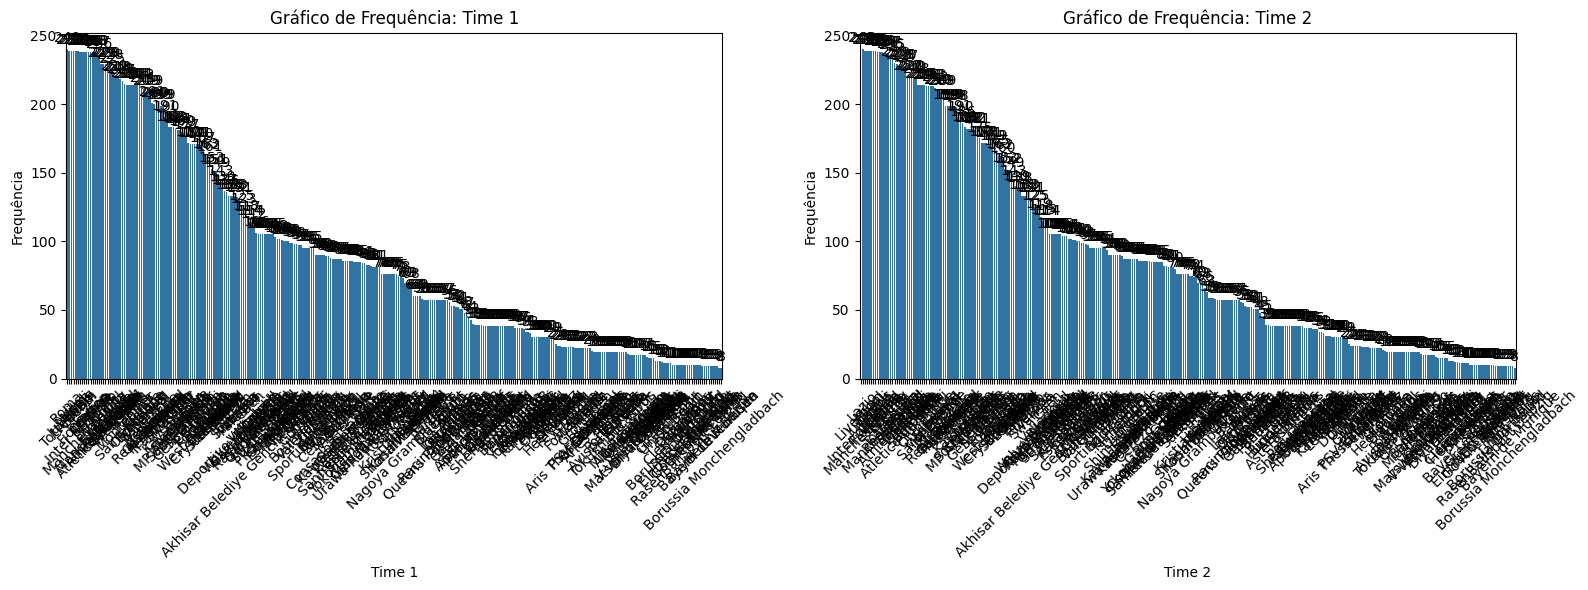

In [198]:
univariada_variavel_categoria(games, ['Time 1', 'Time 2'])

São 310 times no total, porém alguns times possuem pouquíssimos jogos. Será que vale considerar todos eles no modelo? Dá pra excluir alguns times que gerem resultados com outliers fortes (como 100% de vitórias ou 100% de derrotas), ou onde seus jogos sejam com outros times que também possuem poucos jogos nos dados?

--- Análise Univariada para Variável Categórica: Position 1 ---
Describe da variável categórica: Position 1


,count,unique,top,freq
Position 1,26018,29,4-2-3-1,7972


Tabela de frequência da variável categórica (com percentuais e total): Position 1


,Position 1,Frequência,Percentual (%)
0,4-2-3-1,7972,28.86
1,4-4-2,4865,17.61
2,4-3-3,4610,16.69
3,3-5-2,1573,5.70
4,4-4-1-1,935,3.39
5,4-3-1-2,864,3.13
6,3-4-3,847,3.07
7,4-1-4-1,718,2.60
8,3-4-2-1,552,2.00
9,4-5-1,533,1.93



--- Análise Univariada para Variável Categórica: Position 2 ---
Describe da variável categórica: Position 2


,count,unique,top,freq
Position 2,25990,30,4-2-3-1,7829


Tabela de frequência da variável categórica (com percentuais e total): Position 2


,Position 2,Frequência,Percentual (%)
0,4-2-3-1,7829,28.35
1,4-3-3,4586,16.60
2,4-4-2,4470,16.18
3,3-5-2,1638,5.93
4,4-4-1-1,952,3.45
5,3-4-3,882,3.19
6,4-1-4-1,829,3.00
7,4-3-1-2,793,2.87
8,4-5-1,720,2.61
9,3-4-2-1,543,1.97



--- Gráficos de Frequência Lado a Lado ---


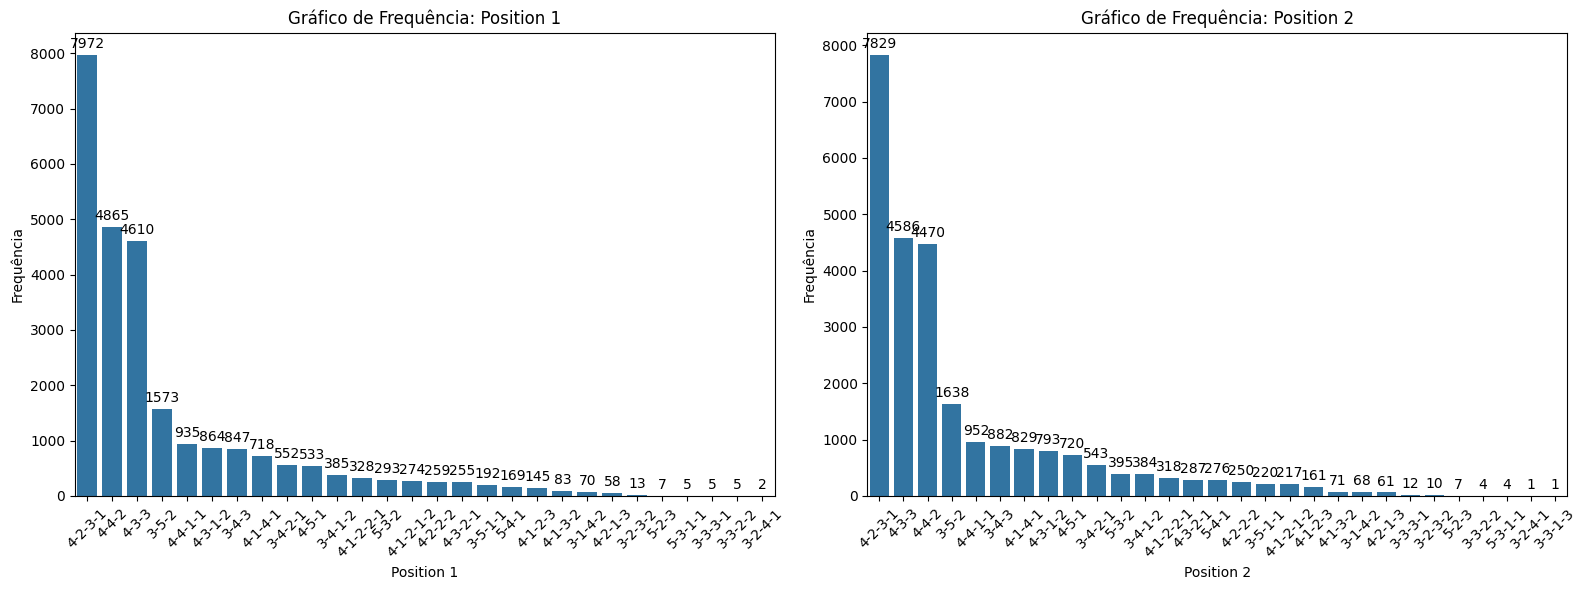

In [192]:
univariada_variavel_categoria(games, ['Position 1', 'Position 2'])

- Posições relevantes: "4-2-3-1", "4-4-2", "4-3-3", e definir uma categoria "Outros" para as demais formações.
- Existe alguma relação entre as posições 4-4-2 e 4-3-3?
- Qual a relação de vitória dos times com a formação escolhida? Há alguma relação clara?

# Análise de dados multivariada

- Considerando então a quantidade de dados disponíveis, vamos estudar o conjunto de dados que possui menos de 11% de dados faltantes, de forma que podemos ter um insight mais geral com uma quantidade maior de dados para as disputas entre esses times
- Os outros dados também possuem relevância, porém podemos considerar que a minoria das partidas que possuem uma quantidade grande de dados disponíveis para serem estudados. Portanto, com certeza são dados relevantes que adicionam informação no que pode ser estudado e modelado, porém devem ser analisadas separadamente, de forma a gerar um outro dataset para modelagem, ou para encontrar relações entre as variáveis com maior disponibilidade que não poderiam ser encontradas sem uma variável intermediária.

<Axes: xlabel='Chutes a gol 1', ylabel='Gols 1'>

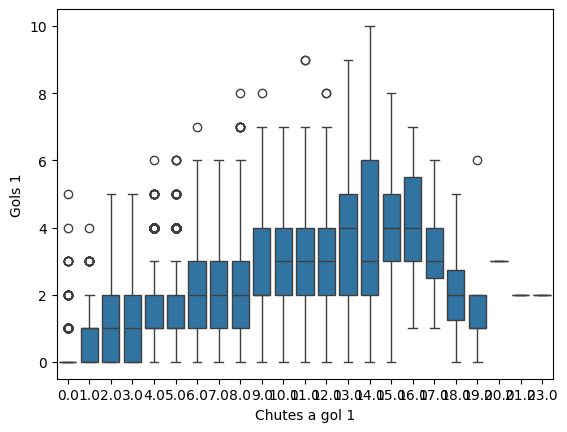

In [193]:
sns.boxplot(x="Chutes a gol 1", y="Gols 1", data=games)